# library

In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(pls)
library(mdatools)
library(pheatmap)
library(eulerr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings



Attaching package: ‘mdatools’


The following object is masked from ‘package:pls’:

    crossval




# load data

In [2]:
setwd('/newdatc/home/wanglab41/opto_fMRI_ST/fmri_th')

In [4]:
getwd()

[1] "/newdatc/home/wanglab41/opto_fMRI_ST/fmri_th"

In [4]:
model_pl168 <- readRDS('./spot_model_pl168.rds')
model_pl201 <- readRDS('./spot_model_pl201.rds')
model_pl186 <- readRDS('./spot_model_pl186.rds')
model_sub191 <- readRDS('./spot_model_sub191.rds')
model_sub193 <- readRDS('./spot_model_sub193.rds')

In [141]:
trainofmri_pl168_scaled <- read.csv('./trainofmri_pl168_scaled.csv',row.names=1)
trainofmri_pl168_scaled$X <- NULL

trainofmri_pl201_scaled <- read.csv('./trainofmri_pl201_scaled.csv',row.names=1)
trainofmri_pl201_scaled$X <- NULL

trainofmri_pl186_scaled <- read.csv('./trainofmri_pl186_scaled.csv',row.names=1)
trainofmri_pl186_scaled$X <- NULL

trainofmri_sub191_scaled <- read.csv('./trainofmri_sub191_scaled.csv',row.names=1)
trainofmri_sub191_scaled$X <- NULL

trainofmri_sub193_scaled <- read.csv('./trainofmri_sub193_scaled.csv',row.names=1)
trainofmri_sub193_scaled$X <- NULL

In [142]:
testX_pl168_scaled <- read.csv('./testX_pl168_scaled.csv',row.names=1)
testX_pl168_scaled$X <- NULL

testX_pl201_scaled <- read.csv('./testX_pl201_scaled.csv',row.names=1)
testX_pl201_scaled$X <- NULL

testX_pl186_scaled <- read.csv('./testX_pl186_scaled.csv',row.names=1)
testX_pl186_scaled$X <- NULL

testX_sub191_scaled <- read.csv('./testX_sub191_scaled.csv',row.names=1)
testX_sub191_scaled$X <- NULL

testX_sub193_scaled <- read.csv('./testX_sub193_scaled.csv',row.names=1)
testX_sub193_scaled$X <- NULL

testofmri_pl168_scaled <- read.csv('./testofmri_pl168_scaled.csv',row.names=1)
testofmri_pl168_scaled$X <- NULL

testofmri_pl201_scaled <- read.csv('./testofmri_pl201_scaled.csv',row.names=1)
testofmri_pl201_scaled$X <- NULL

testofmri_pl186_scaled <- read.csv('./testofmri_pl186_scaled.csv',row.names=1)
testofmri_pl186_scaled$X <- NULL

testofmri_sub191_scaled <- read.csv('./testofmri_sub191_scaled.csv',row.names=1)
testofmri_sub191_scaled$X <- NULL

testofmri_sub193_scaled <- read.csv('./testofmri_sub193_scaled.csv',row.names=1)
testofmri_sub193_scaled$X <- NULL

In [15]:
cor.test(trainofmri_pl168_scaled$ofmri_activation,testofmri_pl168_scaled$ofmri_activation)


	Pearson's product-moment correlation

data:  trainofmri_pl168_scaled$ofmri_activation and testofmri_pl168_scaled$ofmri_activation
t = 49.733, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7518039 0.7905187
sample estimates:
      cor 
0.7718758 


In [9]:
cor.test(trainofmri_sub193_scaled$ofmri_activation,testofmri_sub193_scaled$ofmri_activation)


	Pearson's product-moment correlation

data:  trainofmri_sub193_scaled$ofmri_activation and testofmri_sub193_scaled$ofmri_activation
t = 50.27, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7553980 0.7936182
sample estimates:
      cor 
0.7752166 


In [9]:
surr_pl186 <- read.csv('./PrL_ofmri_activation_surrogate_maps186.csv',header=FALSE)
surr_pl201 <- read.csv('./PrL_ofmri_activation_surrogate_maps201.csv',header=FALSE)
surr_pl168 <- read.csv('./PrL_ofmri_activation_scaled_surrogate_maps.csv',header=FALSE)
surr_sub193 <- read.csv('./SUB_ofmri_activation_surrogate_maps193.csv',header=FALSE)
surr_sub191 <- read.csv('./SUB_ofmri_activation_scaled_surrogate_maps.csv',header=FALSE)

In [10]:
surr_pl186 <- data.frame(t(surr_pl186))
surr_pl168 <- data.frame(t(surr_pl168))
surr_pl201 <- data.frame(t(surr_pl201))
surr_sub191 <- data.frame(t(surr_sub191))
surr_sub193 <- data.frame(t(surr_sub193))

In [11]:
head(surr_pl186)

X1          X2           X3          X4          X5            X6          
V1 -0.14098040 -0.168474829  0.02956660  0.08744674  0.0007411344  0.125136245
V2 -0.13153584  0.005577713  0.07945066  0.11818876  0.1309945597  0.047714274
V3 -0.03806054 -0.122992143 -0.01385574 -0.12274667 -0.0211028068 -0.145232112
V4 -0.08652939  0.100075835 -0.01081461  0.10441925  0.1498553888 -0.015277656
V5 -0.22698367 -0.029003515  0.14312957  0.13530201  0.1043599517 -0.006025906
V6  0.05120762 -0.174565913 -0.09253064 -0.02945457  0.0193380003 -0.111328988
   X7          X8          X9          X10         ⋯ X9991       X9992       
V1  0.14782622 -0.01063437  0.08622535 -0.01548588 ⋯ -0.03239664 -0.007947059
V2  0.02959983  0.02389896 -0.05725543 -0.04958087 ⋯  0.13271319  0.223732814
V3  0.01312558  0.12957933  0.01376239 -0.11246629 ⋯ -0.07960223  0.004881650
V4  0.12860956  0.08140851 -0.10457326 -0.06504289 ⋯  0.10661926  0.173584725
V5  0.03167908  0.13266223 -0.17147856  0.06828225 ⋯  0.13135648  0.219498421
V6 -0.08076815  0.05035113 -0.01931267 -0.01944823 ⋯ -0.04305658 -0.063334074
   X9993        X9994       X9995        X9996        X9997        X9998      
V1 -0.051590795  0.06746613  0.004786333  0.140753108  0.033506899  0.02461764
V2  0.022759742 -0.04359031  0.155368118 -0.056137674 -0.050493396 -0.19595139
V3 -0.043360651 -0.02239894 -0.136260675 -0.012585415 -0.009063165  0.04894046
V4 -0.022999558 -0.05222166  0.099897958  0.005741834  0.018852620 -0.10557177
V5  0.074553707 -0.14051006  0.073720756 -0.084979731  0.034155942 -0.08820036
V6 -0.005414314  0.01231310 -0.114406337 -0.036796193 -0.056979037  0.07278202
   X9999       X10000     
V1 -0.04561378  0.02796353
V2 -0.02923137 -0.01173383
V3  0.08405327  0.02383157
V4 -0.03072638 -0.01573510
V5 -0.11400798 -0.01126966
V6  0.18114792 -0.04619284

In [13]:
dim(model_pl168$loadings)

[1] 16331  1679

In [14]:
dim(testX_pl168_scaled)

[1]  1680 16337

# permutation

## pl168

In [22]:
df <- trainofmri_pl168_scaled

df$surr <- surr_pl168[,'X1']
Xscores <- scores(model_pl168)
Xcorr <- data.frame(cor(Xscores,df$surr))
colnames(Xcorr) <- 'value1'

for(i in 2:1000){
    df$surr <- surr_pl168[,paste0('X',i)]
    xcorr <- data.frame(cor(Xscores,df$surr))
    colnames(xcorr) <- paste0('value',i)
    Xcorr <- cbind(Xcorr,xcorr)
}

Xcorr_pl168 <- Xcorr

## pl201

In [28]:
df <- trainofmri_pl201_scaled

df$surr <- surr_pl201[,'X1']
Xscores <- scores(model_pl201)
Xcorr <- data.frame(cor(Xscores,df$surr))
colnames(Xcorr) <- 'value1'

for(i in 2:1000){
    df$surr <- surr_pl201[,paste0('X',i)]
    xcorr <- data.frame(cor(Xscores,df$surr))
    colnames(xcorr) <- paste0('value',i)
    Xcorr <- cbind(Xcorr,xcorr)
}

Xcorr_pl201 <- Xcorr

## pl186

In [29]:
df <- trainofmri_pl186_scaled

df$surr <- surr_pl186[,'X1']
Xscores <- scores(model_pl186)
Xcorr <- data.frame(cor(Xscores,df$surr))
colnames(Xcorr) <- 'value1'

for(i in 2:1000){
    df$surr <- surr_pl186[,paste0('X',i)]
    xcorr <- data.frame(cor(Xscores,df$surr))
    colnames(xcorr) <- paste0('value',i)
    Xcorr <- cbind(Xcorr,xcorr)
}

Xcorr_pl186 <- Xcorr

## sub191

In [30]:
df <- trainofmri_sub191_scaled

df$surr <- surr_sub191[,'X1']
Xscores <- scores(model_sub191)
Xcorr <- data.frame(cor(Xscores,df$surr))
colnames(Xcorr) <- 'value1'

for(i in 2:1000){
    df$surr <- surr_sub191[,paste0('X',i)]
    xcorr <- data.frame(cor(Xscores,df$surr))
    colnames(xcorr) <- paste0('value',i)
    Xcorr <- cbind(Xcorr,xcorr)
}

Xcorr_sub191 <- Xcorr

## sub193

In [31]:
df <- trainofmri_sub193_scaled

df$surr <- surr_sub193[,'X1']
Xscores <- scores(model_sub193)
Xcorr <- data.frame(cor(Xscores,df$surr))
colnames(Xcorr) <- 'value1'

for(i in 2:1000){
    df$surr <- surr_sub193[,paste0('X',i)]
    xcorr <- data.frame(cor(Xscores,df$surr))
    colnames(xcorr) <- paste0('value',i)
    Xcorr <- cbind(Xcorr,xcorr)
}

Xcorr_sub193 <- Xcorr

In [32]:
Xcorr_pl168_t <- t(Xcorr_pl168)
Xcorr_pl168_t <- data.frame(Xcorr_pl168_t)

Xcorr_pl201_t <- t(Xcorr_pl201)
Xcorr_pl201_t <- data.frame(Xcorr_pl201_t)

Xcorr_pl186_t <- t(Xcorr_pl186)
Xcorr_pl186_t <- data.frame(Xcorr_pl186_t)

Xcorr_sub191_t <- t(Xcorr_sub191)
Xcorr_sub191_t <- data.frame(Xcorr_sub191_t)

Xcorr_sub193_t <- t(Xcorr_sub193)
Xcorr_sub193_t <- data.frame(Xcorr_sub193_t)

# histogram

In [38]:
X_scores <- scores(model_pl168)
obs_pl168 <- data.frame(cor(X_scores,trainofmri_pl168_scaled$ofmri_activation))

In [39]:
X_scores <- scores(model_pl201)
obs_pl201 <- data.frame(cor(X_scores,trainofmri_pl201_scaled$ofmri_activation))

In [40]:
X_scores <- scores(model_pl186)
obs_pl186 <- data.frame(cor(X_scores,trainofmri_pl186_scaled$ofmri_activation))

In [41]:
X_scores <- scores(model_sub191)
obs_sub191 <- data.frame(cor(X_scores,trainofmri_sub191_scaled$ofmri_activation))

In [42]:
X_scores <- scores(model_sub193)
obs_sub193 <- data.frame(cor(X_scores,trainofmri_sub193_scaled$ofmri_activation))

## pl168

In [43]:
mean(Xcorr_pl168_t$`Comp.1` > obs_pl168['Comp 1',])

[1] 0

In [44]:
mean(Xcorr_pl168_t$`Comp.2` > obs_pl168['Comp 2',])

[1] 0.002

In [45]:
mean(Xcorr_pl168_t$`Comp.3` > obs_pl168['Comp 3',])

[1] 0.01

In [46]:
mean(Xcorr_pl168_t$`Comp.4` > obs_pl168['Comp 4',])

[1] 0.002

In [47]:
mean(Xcorr_pl168_t$`Comp.5` > obs_pl168['Comp 5',])

[1] 0.047

In [48]:
mean(Xcorr_pl168_t$`Comp.6` > obs_pl168['Comp 6',])

[1] 0.032

In [59]:
mean(Xcorr_pl168_t$`Comp.7` > obs_pl168['Comp 7',])

[1] 0.163

In [60]:
mean(Xcorr_pl168_t$`Comp.8` > obs_pl168['Comp 8',])

[1] 0.313

In [61]:
mean(Xcorr_pl168_t$`Comp.9` > obs_pl168['Comp 9',])

[1] 0.198

In [62]:
mean(Xcorr_pl168_t$`Comp.10` > obs_pl168['Comp 10',])

[1] 0.265

In [63]:
getwd()

[1] "/date/home/wanglab33/02Thalamus/analysis20240613/folder/pls0910"

In [64]:
setwd('../')

In [65]:
dir.create('permutation241024')
setwd('permutation241024')

In [67]:
write.csv(Xcorr_pl168_t,'./PrL168_Xcorr_permutation.csv')

write.csv(Xcorr_pl201_t,'./PrL201_Xcorr_permutation.csv')

write.csv(Xcorr_pl186_t,'./PrL186_Xcorr_permutation.csv')

write.csv(Xcorr_sub191_t,'./SUB191_Xcorr_permutation.csv')

write.csv(Xcorr_sub193_t,'./SUB193_Xcorr_permutation.csv')

In [75]:
pdf('./PrL168_permutation_corr.pdf')
p_value <- mean(Xcorr_pl168_t$`Comp.1` > obs_pl168['Comp 1',])
hist(Xcorr_pl168_t$`Comp.1`,main=paste0("PrL 168 model Comp 1 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl168['Comp 1',],col="red")
text(x=obs_pl168['Comp 1',], y=100, paste0('r=',obs_pl168['Comp 1',]))

p_value <- mean(Xcorr_pl168_t$`Comp.2` > obs_pl168['Comp 2',])
hist(Xcorr_pl168_t$`Comp.2`,main=paste0("PrL 168 model Comp 2 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl168['Comp 2',],col="red")
text(x=obs_pl168['Comp 2',], y=100, paste0('r=',obs_pl168['Comp 2',]))

p_value <- mean(Xcorr_pl168_t$`Comp.3` > obs_pl168['Comp 3',])
hist(Xcorr_pl168_t$`Comp.3`,main=paste0("PrL 168 model Comp 3 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl168['Comp 3',],col="red")
text(x=obs_pl168['Comp 3',], y=100, paste0('r=',obs_pl168['Comp 3',]))

p_value <- mean(Xcorr_pl168_t$`Comp.4` > obs_pl168['Comp 4',])
hist(Xcorr_pl168_t$`Comp.4`,main=paste0("PrL 168 model Comp 4 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl168['Comp 4',],col="red")
text(x=obs_pl168['Comp 4',], y=100, paste0('r=',obs_pl168['Comp 4',]))

p_value <- mean(Xcorr_pl168_t$`Comp.5` > obs_pl168['Comp 5',])
hist(Xcorr_pl168_t$`Comp.5`,main=paste0("PrL 168 model Comp 5 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl168['Comp 5',],col="red")
text(x=obs_pl168['Comp 5',], y=100, paste0('r=',obs_pl168['Comp 5',]))

p_value <- mean(Xcorr_pl168_t$`Comp.6` > obs_pl168['Comp 6',])
hist(Xcorr_pl168_t$`Comp.6`,main=paste0("PrL 168 model Comp 6 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl168['Comp 6',],col="red")
text(x=obs_pl168['Comp 6',], y=100, paste0('r=',obs_pl168['Comp 6',]))

p_value <- mean(Xcorr_pl168_t$`Comp.7` > obs_pl168['Comp 7',])
hist(Xcorr_pl168_t$`Comp.7`,main=paste0("PrL 168 model Comp 7 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl168['Comp 7',],col="red")
text(x=obs_pl168['Comp 7',], y=100, paste0('r=',obs_pl168['Comp 7',]))
dev.off()

png 
  2

## pl201

In [76]:
mean(Xcorr_pl201_t$`Comp.1` > obs_pl201['Comp 1',])

[1] 0.002

In [77]:
mean(Xcorr_pl201_t$`Comp.2` > obs_pl201['Comp 2',])

[1] 0

In [78]:
mean(Xcorr_pl201_t$`Comp.3` > obs_pl201['Comp 3',])

[1] 0

In [79]:
mean(Xcorr_pl201_t$`Comp.4` > obs_pl201['Comp 4',])

[1] 0.002

In [80]:
mean(Xcorr_pl201_t$`Comp.5` > obs_pl201['Comp 5',])

[1] 0.114

In [81]:
mean(Xcorr_pl201_t$`Comp.6` > obs_pl201['Comp 6',])

[1] 0.09

In [82]:
mean(Xcorr_pl201_t$`Comp.7` > obs_pl201['Comp 7',])

[1] 0.108

In [83]:
mean(Xcorr_pl201_t$`Comp.8` > obs_pl201['Comp 8',])

[1] 0.102

In [84]:
mean(Xcorr_pl201_t$`Comp.9` > obs_pl201['Comp 9',])

[1] 0.276

In [85]:
mean(Xcorr_pl201_t$`Comp.10` > obs_pl201['Comp 10',])

[1] 0.303

In [86]:
pdf('./PrL201_permutation_corr.pdf')
p_value <- mean(Xcorr_pl201_t$`Comp.1` > obs_pl201['Comp 1',])
hist(Xcorr_pl201_t$`Comp.1`,main=paste0("PrL 201 model Comp 1 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl201['Comp 1',],col="red")
text(x=obs_pl201['Comp 1',], y=100, paste0('r=',obs_pl201['Comp 1',]))

p_value <- mean(Xcorr_pl201_t$`Comp.2` > obs_pl201['Comp 2',])
hist(Xcorr_pl201_t$`Comp.2`,main=paste0("PrL 201 model Comp 2 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl201['Comp 2',],col="red")
text(x=obs_pl201['Comp 2',], y=100, paste0('r=',obs_pl201['Comp 2',]))

p_value <- mean(Xcorr_pl201_t$`Comp.3` > obs_pl201['Comp 3',])
hist(Xcorr_pl201_t$`Comp.3`,main=paste0("PrL 201 model Comp 3 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl201['Comp 3',],col="red")
text(x=obs_pl201['Comp 3',], y=100, paste0('r=',obs_pl201['Comp 3',]))

p_value <- mean(Xcorr_pl201_t$`Comp.4` > obs_pl201['Comp 4',])
hist(Xcorr_pl201_t$`Comp.4`,main=paste0("PrL 201 model Comp 4 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl201['Comp 4',],col="red")
text(x=obs_pl201['Comp 4',], y=100, paste0('r=',obs_pl201['Comp 4',]))

p_value <- mean(Xcorr_pl201_t$`Comp.5` > obs_pl201['Comp 5',])
hist(Xcorr_pl201_t$`Comp.5`,main=paste0("PrL 201 model Comp 5 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl201['Comp 5',],col="red")
text(x=obs_pl201['Comp 5',], y=100, paste0('r=',obs_pl201['Comp 5',]))

dev.off()

png 
  2

## pl 186

In [87]:
mean(Xcorr_pl186_t$`Comp.1` > obs_pl186['Comp 1',])

[1] 0

In [88]:
mean(Xcorr_pl186_t$`Comp.2` > obs_pl186['Comp 2',])

[1] 0.004

In [89]:
mean(Xcorr_pl186_t$`Comp.3` > obs_pl186['Comp 3',])

[1] 0.001

In [90]:
mean(Xcorr_pl186_t$`Comp.4` > obs_pl186['Comp 4',])

[1] 0.016

In [91]:
mean(Xcorr_pl186_t$`Comp.5` > obs_pl186['Comp 5',])

[1] 0.014

In [92]:
mean(Xcorr_pl186_t$`Comp.6` > obs_pl186['Comp 6',])

[1] 0.109

In [93]:
mean(Xcorr_pl186_t$`Comp.7` > obs_pl186['Comp 7',])

[1] 0.235

In [94]:
mean(Xcorr_pl186_t$`Comp.8` > obs_pl186['Comp 8',])

[1] 0.211

In [95]:
mean(Xcorr_pl186_t$`Comp.9` > obs_pl186['Comp 9',])

[1] 0.28

In [96]:
mean(Xcorr_pl186_t$`Comp.10` > obs_pl186['Comp 10',])

[1] 0.255

In [97]:
pdf('./PrL186_permutation_corr.pdf')
p_value <- mean(Xcorr_pl186_t$`Comp.1` > obs_pl186['Comp 1',])
hist(Xcorr_pl186_t$`Comp.1`,main=paste0("PrL 186 model Comp 1 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl186['Comp 1',],col="red")
text(x=obs_pl186['Comp 1',], y=100, paste0('r=',obs_pl186['Comp 1',]))

p_value <- mean(Xcorr_pl186_t$`Comp.2` > obs_pl186['Comp 2',])
hist(Xcorr_pl186_t$`Comp.2`,main=paste0("PrL 186 model Comp 2 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl186['Comp 2',],col="red")
text(x=obs_pl186['Comp 2',], y=100, paste0('r=',obs_pl186['Comp 2',]))

p_value <- mean(Xcorr_pl186_t$`Comp.3` > obs_pl186['Comp 3',])
hist(Xcorr_pl186_t$`Comp.3`,main=paste0("PrL 186 model Comp 3 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl186['Comp 3',],col="red")
text(x=obs_pl186['Comp 3',], y=100, paste0('r=',obs_pl186['Comp 3',]))

p_value <- mean(Xcorr_pl186_t$`Comp.4` > obs_pl186['Comp 4',])
hist(Xcorr_pl186_t$`Comp.4`,main=paste0("PrL 186 model Comp 4 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl186['Comp 4',],col="red")
text(x=obs_pl186['Comp 4',], y=100, paste0('r=',obs_pl186['Comp 4',]))

p_value <- mean(Xcorr_pl186_t$`Comp.5` > obs_pl186['Comp 5',])
hist(Xcorr_pl186_t$`Comp.5`,main=paste0("PrL 186 model Comp 5 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl186['Comp 5',],col="red")
text(x=obs_pl186['Comp 5',], y=100, paste0('r=',obs_pl186['Comp 5',]))

p_value <- mean(Xcorr_pl186_t$`Comp.6` > obs_pl186['Comp 6',])
hist(Xcorr_pl186_t$`Comp.6`,main=paste0("PrL 186 model Comp 6 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl186['Comp 6',],col="red")
text(x=obs_pl186['Comp 6',], y=100, paste0('r=',obs_pl186['Comp 6',]))

dev.off()

png 
  2

## sub 191

In [98]:
mean(Xcorr_sub191_t$`Comp.1` > obs_sub191['Comp 1',])

[1] 0

In [99]:
mean(Xcorr_sub191_t$`Comp.2` > obs_sub191['Comp 2',])

[1] 0.044

In [100]:
mean(Xcorr_sub191_t$`Comp.3` > obs_sub191['Comp 3',])

[1] 0.002

In [101]:
mean(Xcorr_sub191_t$`Comp.4` > obs_sub191['Comp 4',])

[1] 0

In [102]:
mean(Xcorr_sub191_t$`Comp.5` > obs_sub191['Comp 5',])

[1] 0.02

In [103]:
mean(Xcorr_sub191_t$`Comp.6` > obs_sub191['Comp 6',])

[1] 0.125

In [104]:
mean(Xcorr_sub191_t$`Comp.7` > obs_sub191['Comp 7',])

[1] 0.2

In [105]:
mean(Xcorr_sub191_t$`Comp.8` > obs_sub191['Comp 8',])

[1] 0.055

In [106]:
mean(Xcorr_sub191_t$`Comp.9` > obs_sub191['Comp 9',])

[1] 0.101

In [107]:
mean(Xcorr_sub191_t$`Comp.10` > obs_sub191['Comp 10',])

[1] 0.208

In [108]:
pdf('./SUB191_permutation_corr.pdf')
p_value <- mean(Xcorr_sub191_t$`Comp.1` > obs_sub191['Comp 1',])
hist(Xcorr_sub191_t$`Comp.1`,main=paste0("SUB 191 model Comp 1 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub191['Comp 1',],col="red")
text(x=obs_sub191['Comp 1',], y=100, paste0('r=',obs_sub191['Comp 1',]))

p_value <- mean(Xcorr_sub191_t$`Comp.2` > obs_sub191['Comp 2',])
hist(Xcorr_sub191_t$`Comp.2`,main=paste0("SUB 191 model Comp 2 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub191['Comp 2',],col="red")
text(x=obs_sub191['Comp 2',], y=100, paste0('r=',obs_sub191['Comp 2',]))

p_value <- mean(Xcorr_sub191_t$`Comp.3` > obs_sub191['Comp 3',])
hist(Xcorr_sub191_t$`Comp.3`,main=paste0("SUB 191 model Comp 3 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub191['Comp 3',],col="red")
text(x=obs_sub191['Comp 3',], y=100, paste0('r=',obs_sub191['Comp 3',]))

p_value <- mean(Xcorr_sub191_t$`Comp.4` > obs_sub191['Comp 4',])
hist(Xcorr_sub191_t$`Comp.4`,main=paste0("SUB 191 model Comp 4 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub191['Comp 4',],col="red")
text(x=obs_sub191['Comp 4',], y=100, paste0('r=',obs_sub191['Comp 4',]))

p_value <- mean(Xcorr_sub191_t$`Comp.5` > obs_sub191['Comp 5',])
hist(Xcorr_sub191_t$`Comp.5`,main=paste0("SUB 191 model Comp 5 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub191['Comp 5',],col="red")
text(x=obs_sub191['Comp 5',], y=100, paste0('r=',obs_sub191['Comp 5',]))

p_value <- mean(Xcorr_sub191_t$`Comp.6` > obs_sub191['Comp 6',])
hist(Xcorr_sub191_t$`Comp.6`,main=paste0("SUB 191 model Comp 6 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub191['Comp 6',],col="red")
text(x=obs_sub191['Comp 6',], y=100, paste0('r=',obs_sub191['Comp 6',]))

dev.off()

png 
  2

## sub 193

In [109]:
mean(Xcorr_sub193_t$`Comp.1` > obs_sub193['Comp 1',])

[1] 0

In [110]:
mean(Xcorr_sub193_t$`Comp.2` > obs_sub193['Comp 2',])

[1] 0.112

In [111]:
mean(Xcorr_sub193_t$`Comp.3` > obs_sub193['Comp 3',])

[1] 0

In [112]:
mean(Xcorr_sub193_t$`Comp.4` > obs_sub193['Comp 4',])

[1] 0

In [113]:
mean(Xcorr_sub193_t$`Comp.5` > obs_sub193['Comp 5',])

[1] 0.012

In [114]:
mean(Xcorr_sub193_t$`Comp.6` > obs_sub193['Comp 6',])

[1] 0.055

In [115]:
mean(Xcorr_sub193_t$`Comp.7` > obs_sub193['Comp 7',])

[1] 0.096

In [116]:
mean(Xcorr_sub193_t$`Comp.8` > obs_sub193['Comp 8',])

[1] 0.126

In [117]:
mean(Xcorr_sub193_t$`Comp.9` > obs_sub193['Comp 9',])

[1] 0.236

In [118]:
mean(Xcorr_sub193_t$`Comp.10` > obs_sub193['Comp 10',])

[1] 0.242

In [119]:
pdf('./SUB193_permutation_corr.pdf')
p_value <- mean(Xcorr_sub193_t$`Comp.1` > obs_sub193['Comp 1',])
hist(Xcorr_sub193_t$`Comp.1`,main=paste0("SUB 193 model Comp 1 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub193['Comp 1',],col="red")
text(x=obs_sub193['Comp 1',], y=100, paste0('r=',obs_sub193['Comp 1',]))

p_value <- mean(Xcorr_sub193_t$`Comp.2` > obs_sub193['Comp 2',])
hist(Xcorr_sub193_t$`Comp.2`,main=paste0("SUB 193 model Comp 2 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub193['Comp 2',],col="red")
text(x=obs_sub193['Comp 2',], y=100, paste0('r=',obs_sub193['Comp 2',]))

p_value <- mean(Xcorr_sub193_t$`Comp.3` > obs_sub193['Comp 3',])
hist(Xcorr_sub193_t$`Comp.3`,main=paste0("SUB 193 model Comp 3 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub193['Comp 3',],col="red")
text(x=obs_sub193['Comp 3',], y=100, paste0('r=',obs_sub193['Comp 3',]))

p_value <- mean(Xcorr_sub193_t$`Comp.4` > obs_sub193['Comp 4',])
hist(Xcorr_sub193_t$`Comp.4`,main=paste0("SUB 193 model Comp 4 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub193['Comp 4',],col="red")
text(x=obs_sub193['Comp 4',], y=100, paste0('r=',obs_sub193['Comp 4',]))

p_value <- mean(Xcorr_sub193_t$`Comp.5` > obs_sub193['Comp 5',])
hist(Xcorr_sub193_t$`Comp.5`,main=paste0("SUB 193 model Comp 5 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub193['Comp 5',],col="red")
text(x=obs_sub193['Comp 5',], y=100, paste0('r=',obs_sub193['Comp 5',]))

p_value <- mean(Xcorr_sub193_t$`Comp.6` > obs_sub193['Comp 6',])
hist(Xcorr_sub193_t$`Comp.6`,main=paste0("SUB 193 model Comp 6 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub193['Comp 6',],col="red")
text(x=obs_sub193['Comp 6',], y=100, paste0('r=',obs_sub193['Comp 6',]))

dev.off()

png 
  2

# prediction

In [123]:
testX_pl168_scaled$Strc <- 0

In [627]:
getwd()

[1] "/date/home/wanglab33/02Thalamus/analysis20240613/folder/permutation241024"

In [128]:
res <- predict(model_pl168,ncomp=6,newdata=testX_pl168_scaled)
res <- data.frame(res)
colnames(res) <- 'comps6'

res$ofmri_activation <- testofmri_pl168_scaled$ofmri_activation
res168 <- res

In [133]:
res <- predict(model_pl201,ncomp=4,newdata=testX_pl201_scaled)
res <- data.frame(res)
colnames(res) <- 'comps4'

res$ofmri_activation <- testofmri_pl201_scaled$ofmri_activation
res201 <- res

In [134]:
res <- predict(model_pl186,ncomp=5,newdata=testX_pl186_scaled)
res <- data.frame(res)
colnames(res) <- 'comps5'

res$ofmri_activation <- testofmri_pl186_scaled$ofmri_activation
res186 <- res

In [137]:
data <- data.frame(cbind(res168$ofmri_activation, res201$ofmri_activation,res186$ofmri_activation, 
                         res168$comps6, res201$comps4,res186$comps5))
colnames(data) <- c('ofmri168','ofmri201','ofmri186','ncomp168','ncomp201','ncomp186')

pdf('./spot_PrL3model_correlation_scatter_allgene.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)
colors <- c("PrL168" = "#3498db", "PrL201" = "#e74c3c", "PrL186" = "#229954")
#Col.rar1<-c("#3498db", "#e74c3c","#229954")
options(repr.plot.width=6,repr.plot.height=6)
ggplot(data)+
geom_point(aes(x=ncomp168,y=ofmri168,color='PrL168'))+
geom_smooth(aes(x=ncomp168,y=ofmri168,color='PrL168'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp201,y=ofmri201,color='PrL201'))+
geom_smooth(aes(x=ncomp201,y=ofmri201,color='PrL201'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp186,y=ofmri186,color='PrL186'))+
geom_smooth(aes(x=ncomp186,y=ofmri186,color='PrL186'),method="lm",se=TRUE)+
xlab('prediction')+
ylab('true value')+
scale_color_manual(values=colors)+
theme_classic()
dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

In [139]:
cor.test(res168$comps6,res168$ofmri_activation)


	Pearson's product-moment correlation

data:  res168$comps6 and res168$ofmri_activation
t = 30.411, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5643433 0.6260572
sample estimates:
      cor 
0.5960799 


In [140]:
cor.test(res201$comps4,res201$ofmri_activation)


	Pearson's product-moment correlation

data:  res201$comps4 and res201$ofmri_activation
t = 23.708, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4642123 0.5359025
sample estimates:
      cor 
0.5009161 


In [141]:
cor.test(res186$comps5,res186$ofmri_activation)


	Pearson's product-moment correlation

data:  res186$comps5 and res186$ofmri_activation
t = 31.84, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5829761 0.6426535
sample estimates:
      cor 
0.6136906 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


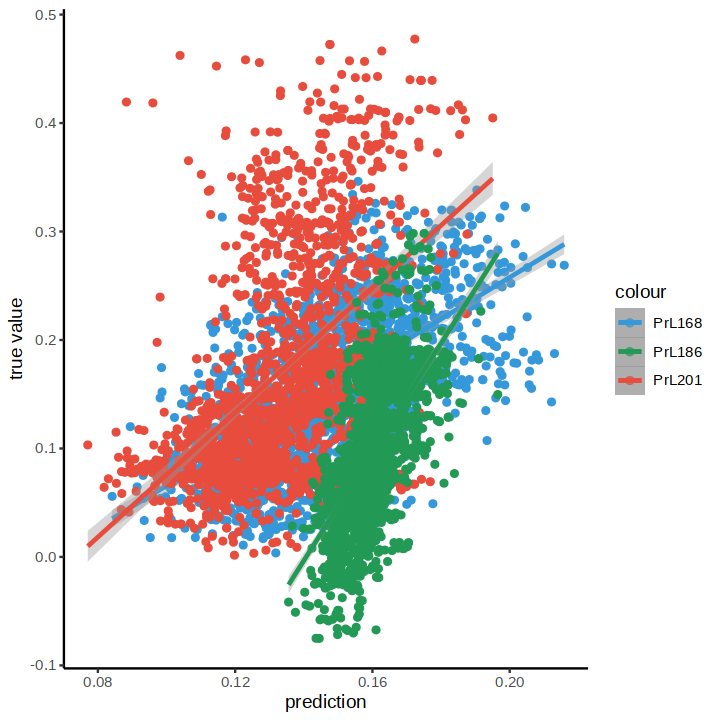

In [138]:
data <- data.frame(cbind(res168$ofmri_activation, res201$ofmri_activation,res186$ofmri_activation, 
                         res168$comps6, res201$comps4,res186$comps5))
colnames(data) <- c('ofmri168','ofmri201','ofmri186','ncomp168','ncomp201','ncomp186')

options(repr.plot.width=6,repr.plot.height=6)
colors <- c("PrL168" = "#3498db", "PrL201" = "#e74c3c", "PrL186" = "#229954")
#Col.rar1<-c("#3498db", "#e74c3c","#229954")
options(repr.plot.width=6,repr.plot.height=6)
ggplot(data)+
geom_point(aes(x=ncomp168,y=ofmri168,color='PrL168'))+
geom_smooth(aes(x=ncomp168,y=ofmri168,color='PrL168'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp201,y=ofmri201,color='PrL201'))+
geom_smooth(aes(x=ncomp201,y=ofmri201,color='PrL201'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp186,y=ofmri186,color='PrL186'))+
geom_smooth(aes(x=ncomp186,y=ofmri186,color='PrL186'),method="lm",se=TRUE)+
xlab('prediction')+
ylab('true value')+
scale_color_manual(values=colors)+
theme_classic()

In [142]:
res <- predict(model_sub191,ncomp=5,newdata=testX_sub191_scaled)
res <- data.frame(res)
colnames(res) <- 'comps5'

res$ofmri_activation <- testofmri_sub191_scaled$ofmri_activation
res191 <- res

In [143]:
res <- predict(model_sub193,ncomp=1,newdata=testX_sub193_scaled)
res <- data.frame(res)
colnames(res) <- 'comps1'

res$ofmri_activation <- testofmri_sub193_scaled$ofmri_activation
res193 <- res

In [148]:
cor.test(res191$comps5,res191$ofmri_activation)


	Pearson's product-moment correlation

data:  res191$comps5 and res191$ofmri_activation
t = 29.947, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5580973 0.6204814
sample estimates:
      cor 
0.5901697 


In [150]:
cor.test(res193$comps1,res193$ofmri_activation)


	Pearson's product-moment correlation

data:  res193$comps1 and res193$ofmri_activation
t = 25.926, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4997499 0.5680877
sample estimates:
      cor 
0.5347927 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


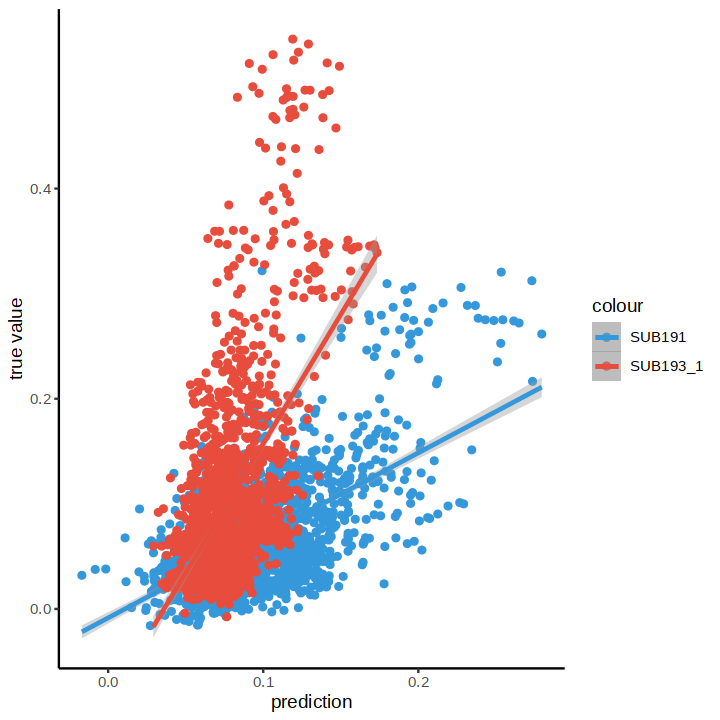

In [149]:
data <- data.frame(cbind(res191$ofmri_activation, res193$ofmri_activation,
                         res191$comps5, res193$comps1))
colnames(data) <- c('ofmri191','ofmri193','ncomp191','ncomp193_1')

#pdf('./spot_SUB2model_correlation_scatter_allgene_193_1.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)
colors <- c("SUB191" = "#3498db", "SUB193_1" = "#e74c3c")

options(repr.plot.width=6,repr.plot.height=6)
ggplot(data)+
geom_point(aes(x=ncomp191,y=ofmri191,color='SUB191'))+
geom_smooth(aes(x=ncomp191,y=ofmri191,color='SUB191'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp193_1,y=ofmri193,color='SUB193_1'))+
geom_smooth(aes(x=ncomp193_1,y=ofmri193,color='SUB193_1'),method="lm",se=TRUE)+

xlab('prediction')+
ylab('true value')+
scale_color_manual(values=colors)+
theme_classic()
#dev.off()

In [151]:
res <- predict(model_sub191,ncomp=5,newdata=testX_sub191_scaled)
res <- data.frame(res)
colnames(res) <- 'comps5'

res$ofmri_activation <- testofmri_sub191_scaled$ofmri_activation
res191 <- res

In [152]:
res <- predict(model_sub193,ncomp=5,newdata=testX_sub193_scaled)
res <- data.frame(res)
colnames(res) <- 'comps5'

res$ofmri_activation <- testofmri_sub193_scaled$ofmri_activation
res193 <- res

In [153]:
cor.test(res191$comps5,res191$ofmri_activation)


	Pearson's product-moment correlation

data:  res191$comps5 and res191$ofmri_activation
t = 29.947, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5580973 0.6204814
sample estimates:
      cor 
0.5901697 


In [154]:
cor.test(res193$comps5,res193$ofmri_activation)


	Pearson's product-moment correlation

data:  res193$comps5 and res193$ofmri_activation
t = 33.87, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6079235 0.6647868
sample estimates:
      cor 
0.6372216 


In [156]:
data <- data.frame(cbind(res191$ofmri_activation, res193$ofmri_activation,
                         res191$comps5, res193$comps5))
colnames(data) <- c('ofmri191','ofmri193','ncomp191','ncomp193_5')

pdf('./spot_SUB2model_correlation_scatter_allgene_193_5.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)
colors <- c("SUB191" = "#3498db", "SUB193_5" = "#e74c3c")

options(repr.plot.width=6,repr.plot.height=6)
ggplot(data)+
geom_point(aes(x=ncomp191,y=ofmri191,color='SUB191'))+
geom_smooth(aes(x=ncomp191,y=ofmri191,color='SUB191'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp193_5,y=ofmri193,color='SUB193_5'))+
geom_smooth(aes(x=ncomp193_5,y=ofmri193,color='SUB193_5'),method="lm",se=TRUE)+

xlab('prediction')+
ylab('true value')+
scale_color_manual(values=colors)+
theme_classic()
dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

# VIP scores

In [2]:
## Beta - PLS regression coefficients matrix (K x M)
## W - PLS weights matrix for X (K x A)
## P - PLS loadings matrix for X (K x A)
## Q - PLS loadings matrix for Y (M x A)
## R - PLS weights matrix to compute scores T directly from original X (K x A)

## VIP returns all VIP values for all variables and all number of components,
## as a ncomp x nvars matrix.
VIP <- function(Q,T,W) {
    SS <- c(Q)^2 * colSums(T^2)
    Wnorm2 <- colSums(W^2)
    SSW <- sweep(W^2, 2, SS / Wnorm2, "*")
    sqrt(nrow(SSW) * apply(SSW, 1, cumsum) / cumsum(SS))
}

## VIPjh returns the VIP of variable j with h components
VIPjh <- function(Q,T,W, j, h) {
    b <- c(Q)[1:h]
    T <- T[,1:h, drop = FALSE]
    SS <- b^2 * colSums(T^2)
    W <- W[,1:h, drop = FALSE]
    Wnorm2 <- colSums(W^2)
    sqrt(nrow(W) * sum(SS * W[j,]^2 / Wnorm2) / sum(SS))
}

In [3]:
setwd('/newdatc/home/wanglab41/opto_fMRI_ST/fmri_th')

In [4]:
vip168 <- read.csv('./spot_PrL168_vipscores_all.csv',row.names=1)
vip201 <- read.csv('./spot_PrL201_vipscores_all.csv',row.names=1)
vip186 <- read.csv('./spot_PrL186_vipscores_all.csv',row.names=1)
vip191 <- read.csv('./spot_SUB191_vipscores_all.csv',row.names=1)
vip193 <- read.csv('./spot_SUB193_vipscores_all.csv',row.names=1)

In [5]:
length(colnames(vip168)[vip168['Comp 6',] > 1.5])

[1] 2199

In [6]:
length(colnames(vip201)[vip201['Comp 4',] > 1.5])

[1] 2177

In [7]:
length(colnames(vip186)[vip186['Comp 5',] > 1.5])

[1] 2231

In [8]:
length(colnames(vip191)[vip191['Comp 5',] > 1.5])

[1] 1740

In [9]:
length(colnames(vip193)[vip193['Comp 5',] > 1.5])

[1] 1680

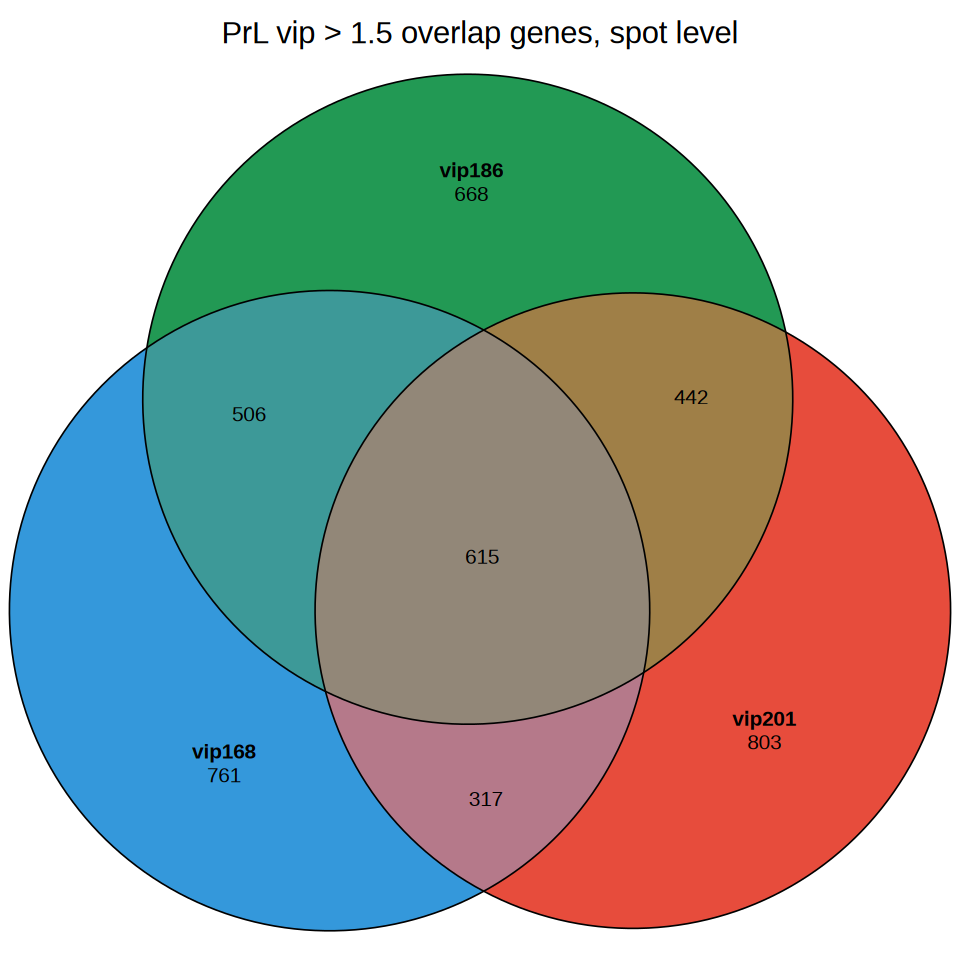

In [10]:
#pdf('./spot_vennPrL_vip_thresh1.pdf',width=8,height=8)
x <- list(vip168 = colnames(vip168)[vip168['Comp 6',] > 1.5], 
          vip201 = colnames(vip201)[vip201['Comp 4',] > 1.5], 
          vip186 = colnames(vip186)[vip186['Comp 5',] > 1.5])
options(repr.plot.width=8,repr.plot.height=8)
plot(euler(x),quantities = TRUE,fill=c("#3498db", "#e74c3c","#229954"),
     main='PrL vip > 1.5 overlap genes, spot level')
#dev.off()

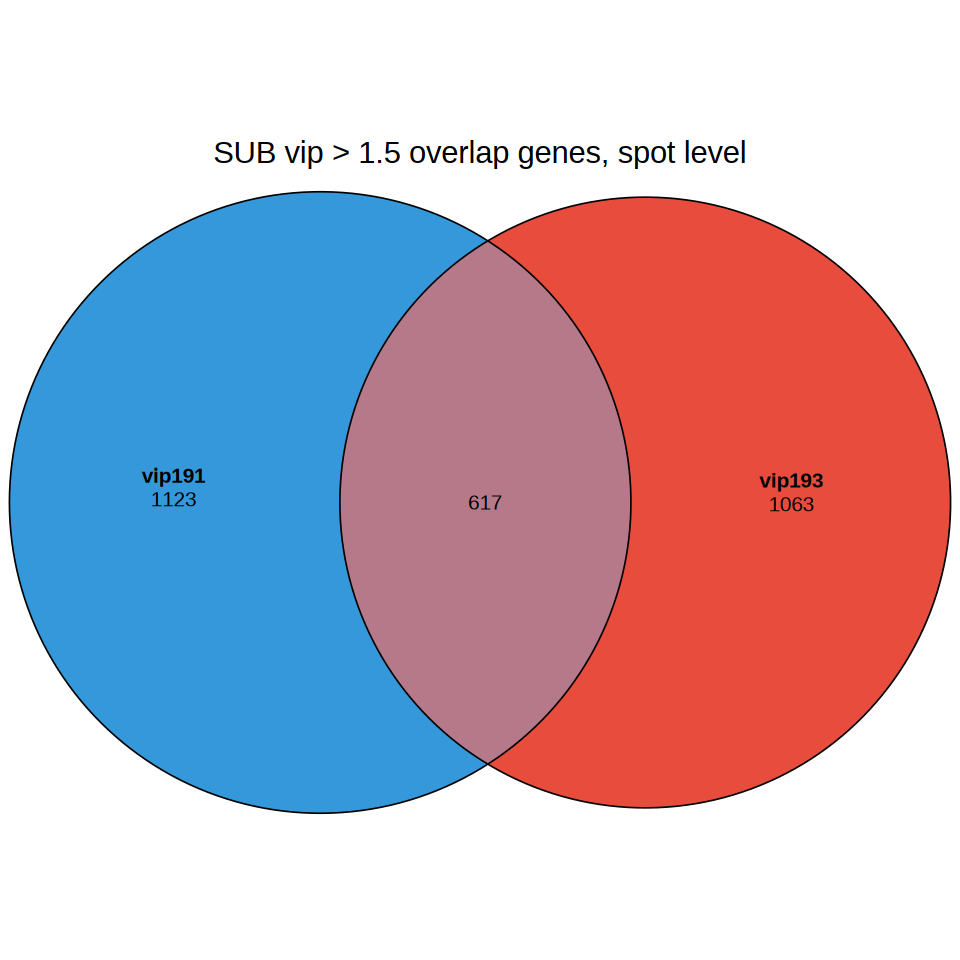

In [11]:
#pdf('./spot_vennSUB_vip_thresh1.pdf',width=8,height=8)
x <- list(vip191 = colnames(vip191)[vip191['Comp 5',] > 1.5], 
          vip193 = colnames(vip193)[vip193['Comp 5',] > 1.5])
options(repr.plot.width=8,repr.plot.height=8)
plot(euler(x),quantities = TRUE,fill=c("#3498db", "#e74c3c"),
     main='SUB vip > 1.5 overlap genes, spot level')
#dev.off()

## gene defined

In [12]:
spot_pl_overlap <- intersect(colnames(vip168)[vip168['Comp 6',] > 1.5], 
                          intersect(colnames(vip201)[vip201['Comp 4',] > 1.5],
                                    colnames(vip186)[vip186['Comp 5',] > 1.5]))

In [13]:
spot_sub_overlap <- intersect(colnames(vip191)[vip191['Comp 5',] > 1.5],
                               colnames(vip193)[vip193['Comp 5',] > 1.5])

In [79]:
c('SUB_proj','SUB_trap') %in% spot_sub_overlap

[1]  TRUE FALSE

In [80]:
c('PrL_proj','PrL_trap') %in% spot_pl_overlap

[1] FALSE FALSE

In [16]:
write.csv(spot_pl_overlap,'./spot_pl_overlapgene_vipthresh15.csv')
write.csv(spot_sub_overlap,'./spot_sub_overlapgene_vipthresh15.csv')

# overlap gene model

In [17]:
X_pl_scaled <- read.csv('./X_pl_scaled.csv',row.names=1)
X_pl_scaled$X <- NULL

X_sub_scaled <- read.csv('./X_sub_scaled.csv',row.names=1)
X_sub_scaled$X <- NULL

ofmri_pl_scaled <- read.csv('./ofmri_pl_scaled.csv',row.names=1)
ofmri_pl_scaled$X <- NULL
ofmri_sub_scaled <- read.csv('./ofmri_sub_scaled.csv',row.names=1)
ofmri_sub_scaled$X <- NULL

In [73]:
colnames(X_pl_scaled)[colnames(X_pl_scaled) == "PrL_proj"] <- "proj"
colnames(X_pl_scaled)[colnames(X_pl_scaled) == "PrL_trap"] <- "trap"
colnames(X_sub_scaled)[colnames(X_sub_scaled) == "SUB_proj"] <- "proj"
colnames(X_sub_scaled)[colnames(X_sub_scaled) == "SUB_trap"] <- "trap"

In [74]:
X_pl_scaled$ofmri_activation <- ofmri_pl_scaled$ofmri_activation
X_sub_scaled$ofmri_activation <- ofmri_sub_scaled$ofmri_activation

In [75]:
cor.test(ofmri_pl_scaled$ofmri_activation,ofmri_sub_scaled$ofmri_activation)


	Pearson's product-moment correlation

data:  ofmri_pl_scaled$ofmri_activation and ofmri_sub_scaled$ofmri_activation
t = 11.441, df = 1678, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2240664 0.3128084
sample estimates:
      cor 
0.2690082 


## model_pl model_sub

In [84]:
spot_sub_overlap <- gsub("SUB_proj", "proj", spot_sub_overlap)

In [85]:
X_pl_scaled_o <- X_pl_scaled[, c(spot_pl_overlap,'proj','trap','ofmri_activation')]
X_sub_scaled_o <- X_sub_scaled[, c(spot_sub_overlap,'ofmri_activation')]

In [86]:
model_pl <- plsr(ofmri_activation~., data=X_pl_scaled_o, scale=FALSE,validation='none')
model_sub <- plsr(ofmri_activation~., data=X_sub_scaled_o, scale=FALSE,validation='none')
saveRDS(model_pl,'./spot_model_plvip15.rds')
saveRDS(model_sub,'./spot_model_subvip15.rds')

In [ ]:
summary(model_pl)

In [ ]:
summary(model_sub)

## model_pl_no model_sub_no

In [20]:
genes_to_remove <- c('PrL_proj', 'PrL_trap')
keep_indices <- !grepl(paste(genes_to_remove, collapse = "|"), spot_pl_overlap)
spot_pl_overlap_no <- spot_pl_overlap[keep_indices]
X_pl_scaled_no <- X_pl_scaled[, c(spot_pl_overlap_no,'ofmri_activation')]

genes_to_remove <- c('SUB_proj', 'SUB_trap')
keep_indices <- !grepl(paste(genes_to_remove, collapse = "|"), spot_sub_overlap)
spot_sub_overlap_no <- spot_sub_overlap[keep_indices]
X_sub_scaled_no <- X_sub_scaled[, c(spot_sub_overlap_no,'ofmri_activation')]

model_pl_no <- plsr(ofmri_activation~., data=X_pl_scaled_no, scale=FALSE,validation='none')
model_sub_no <- plsr(ofmri_activation~., data=X_sub_scaled_no, scale=FALSE,validation='none')
saveRDS(model_pl_no,'./spot_model_pl_no_vip1.rds')
saveRDS(model_sub_no,'./spot_model_sub_no_vip1.rds')

## statistics

In [89]:
pdf('./spot_PrLX_variance_explained_vip15.pdf',width=10,height=10)
options(repr.plot.width=10,repr.plot.height=10)
#Col.rar1<-c("#3498db", "#e74c3c","#229954")
plot(cumsum(explvar(model_pl)), ylim=c(0,100), 
     xlab = "Number of Components",
     ylab = "Accumulate X Variance Explained (%)", 
     main = "X Variance Explained by PLS Components")
dev.off()

pdf 
  2

In [90]:
pdf('./spot_SUBX_variance_explained_vip15.pdf',width=10,height=10)
options(repr.plot.width=10,repr.plot.height=10)
plot(cumsum(explvar(model_sub)), ylim=c(0,100), 
     xlab = "Number of Components",
     ylab = "Accumulate X Variance Explained (%)", 
     main = "X Variance Explained by PLS Components")
dev.off()

pdf 
  2

In [91]:
R2_pl <- R2(model_pl_no,estimate='train')
R2_sub <- R2(model_sub_no,estimate='train')

In [92]:
R2_pl

(Intercept)      1 comps      2 comps      3 comps      4 comps      5 comps  
     0.0000       0.4542       0.6870       0.7977       0.8376       0.8598  
    6 comps      7 comps      8 comps      9 comps     10 comps     11 comps  
     0.8707       0.8764       0.8812       0.8839       0.8857       0.8870  
   12 comps     13 comps     14 comps     15 comps     16 comps     17 comps  
     0.8877       0.8881       0.8885       0.8887       0.8889       0.8890  
   18 comps     19 comps     20 comps     21 comps     22 comps     23 comps  
     0.8891       0.8891       0.8892       0.8892       0.8893       0.8893  
   24 comps     25 comps     26 comps     27 comps     28 comps     29 comps  
     0.8893       0.8893       0.8893       0.8893       0.8893       0.8893  
   30 comps     31 comps     32 comps     33 comps     34 comps     35 comps  
     0.8893       0.8893       0.8893       0.8893       0.8893       0.8893  
   36 comps     37 comps     38 comps     39 comps  

In [93]:
R2_sub

(Intercept)      1 comps      2 comps      3 comps      4 comps      5 comps  
     0.0000       0.4460       0.6177       0.6604       0.7118       0.7383  
    6 comps      7 comps      8 comps      9 comps     10 comps     11 comps  
     0.7597       0.7730       0.7807       0.7862       0.7902       0.7929  
   12 comps     13 comps     14 comps     15 comps     16 comps     17 comps  
     0.7949       0.7967       0.7980       0.7990       0.7999       0.8009  
   18 comps     19 comps     20 comps     21 comps     22 comps     23 comps  
     0.8018       0.8026       0.8034       0.8042       0.8048       0.8055  
   24 comps     25 comps     26 comps     27 comps     28 comps     29 comps  
     0.8061       0.8066       0.8071       0.8075       0.8078       0.8080  
   30 comps     31 comps     32 comps     33 comps     34 comps     35 comps  
     0.8082       0.8083       0.8084       0.8085       0.8085       0.8086  
   36 comps     37 comps     38 comps     39 comps  

In [94]:
pdf('./spot_PrL_Y_variance_explained_vip15.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)

plot(1:30,R2_pl$val[-1][0:30], ylim=c(0,1),
     main = "Y Variance Explained by PLS Components",
     xlab = "Number of Components",
     ylab = "Accumulate Y Variance Explained (%)")
dev.off()

pdf 
  2

In [95]:
pdf('./spot_SUBY_variance_explained_vip15.pdf',width=10,height=10)
options(repr.plot.width=6,repr.plot.height=6)

plot(1:30,R2_sub$val[-1][0:30], ylim=c(0,1),
     main = "Y Variance Explained by PLS Components",
     xlab = "Number of Components",
     ylab = "Accumulate Y Variance Explained (%)")
dev.off()

pdf 
  2

## X_scores Y_scores

In [96]:
X_scores_pl <- scores(model_pl)
Y_scores_pl <- Yscores(model_pl)

X_scores_sub <- scores(model_sub)
Y_scores_sub <- Yscores(model_sub)

In [97]:
pdf('./spot_PrL_Xscores_PLS123_vip15.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)
plot(X_scores_pl[,1], X_scores_pl[,2], lwd = 0.1, xlab = "PLS 1", ylab = "PLS 2",
     main = "PrL X Scores", pch = 19, col = "lightblue")
plot(X_scores_pl[,2], X_scores_pl[,3], lwd = 0.1, xlab = "PLS 2", ylab = "PLS 3",
     main = "PrL X Scores", pch = 19, col = "lightblue")
dev.off()

pdf 
  2

In [98]:
pdf('./spot_SUB_Xscores_PLS123_vip15.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)
plot(X_scores_sub[,1], X_scores_sub[,2], lwd = 0.1, xlab = "PLS 1", ylab = "PLS 2",
     main = "SUB X Scores", pch = 19, col = "lightblue")
plot(X_scores_sub[,2], X_scores_sub[,3], lwd = 0.1, xlab = "PLS 2", ylab = "PLS 3",
     main = "SUB X Scores", pch = 19, col = "lightblue")
dev.off()

pdf 
  2

In [99]:
pdf('./spot_PrL_Yscores_PLS123_overlap.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)
plot(Y_scores_pl[,1], Y_scores_pl[,2], lwd = 0.1, xlab = "PLS 1", ylab = "PLS 2",
     main = "PrL Y Scores", pch = 19, col = "pink")
plot(Y_scores_pl[,2], Y_scores_pl[,3], lwd = 0.1, xlab = "PLS 2", ylab = "PLS 3",
     main = "PrL Y Scores", pch = 19, col = "pink")
dev.off()

pdf 
  2

In [100]:
pdf('./spot_SUB_Yscores_PLS123_overlap.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)
plot(Y_scores_sub[,1], Y_scores_sub[,2], lwd = 0.1, xlab = "PLS 1", ylab = "PLS 2",
     main = "SUB Y Scores", pch = 19, col = "pink")
plot(Y_scores_sub[,2], Y_scores_sub[,3], lwd = 0.1, xlab = "PLS 2", ylab = "PLS 3",
     main = "SUB Y Scores", pch = 19, col = "pink")
dev.off()

pdf 
  2

## permutation

In [101]:
surr_pl <- read.csv('./PrL_ofmri_activation_scaled_all_surrogate_maps.csv',header=FALSE)
surr_sub <- read.csv('./SUB_ofmri_activation_scaled_all_surrogate_maps.csv',header=FALSE)

In [102]:
surr_pl <- data.frame(t(surr_pl))
surr_sub <- data.frame(t(surr_sub))

In [320]:
dim(X_scores_pl)

[1] 1680  617

In [103]:
Xcorr <- data.frame(cor(X_scores_pl,surr_pl[,'X1']))
colnames(Xcorr) <- 'value1'

for(i in 2:10000){
    xcorr <- data.frame(cor(X_scores_pl,surr_pl[,paste0('X',i)]))
    colnames(xcorr) <- paste0('value',i)
    Xcorr <- cbind(Xcorr,xcorr)
}

Xcorr_pl <- Xcorr

In [104]:
Xcorr <- data.frame(cor(X_scores_sub,surr_sub[,'X1']))
colnames(Xcorr) <- 'value1'

for(i in 2:10000){
    xcorr <- data.frame(cor(X_scores_sub,surr_sub[,paste0('X',i)]))
    colnames(xcorr) <- paste0('value',i)
    Xcorr <- cbind(Xcorr,xcorr)
}

Xcorr_sub <- Xcorr

In [105]:
Xcorr_pl_t <- t(Xcorr_pl)
Xcorr_pl_t <- data.frame(Xcorr_pl_t)

In [106]:
Xcorr_sub_t <- t(Xcorr_sub)
Xcorr_sub_t <- data.frame(Xcorr_sub_t)

In [113]:
obs_pl <- data.frame(cor(X_scores_pl,X_pl_scaled$ofmri_activation))
obs_sub <- data.frame(cor(X_scores_sub,X_sub_scaled$ofmri_activation))

In [114]:
mean(Xcorr_pl_t$`Comp.1` > obs_pl['Comp 1',])

[1] 0

In [115]:
mean(Xcorr_pl_t$`Comp.2` > obs_pl['Comp 2',])

[1] 0.0176

In [116]:
mean(Xcorr_pl_t$`Comp.3` > obs_pl['Comp 3',])

[1] 0.0021

In [117]:
mean(Xcorr_pl_t$`Comp.4` > obs_pl['Comp 4',])

[1] 0.009

In [118]:
mean(Xcorr_pl_t$`Comp.5` > obs_pl['Comp 5',])

[1] 0.0028

In [119]:
mean(Xcorr_pl_t$`Comp.6` > obs_pl['Comp 6',])

[1] 0.1179

In [120]:
mean(Xcorr_pl_t$`Comp.7` > obs_pl['Comp 7',])

[1] 0.3002

In [121]:
mean(Xcorr_pl_t$`Comp.8` > obs_pl['Comp 8',])

[1] 0.0756

In [122]:
mean(Xcorr_pl_t$`Comp.9` > obs_pl['Comp 9',])

[1] 0.1418

In [123]:
mean(Xcorr_pl_t$`Comp.10` > obs_pl['Comp 10',])

[1] 0.2403

In [124]:
mean(Xcorr_sub_t$`Comp.1` > obs_sub['Comp 1',])

[1] 0

In [125]:
mean(Xcorr_sub_t$`Comp.2` > obs_sub['Comp 2',])

[1] 0

In [126]:
mean(Xcorr_sub_t$`Comp.3` > obs_sub['Comp 3',])

[1] 0.1395

In [127]:
mean(Xcorr_sub_t$`Comp.4` > obs_sub['Comp 4',])

[1] 0.0028

In [128]:
mean(Xcorr_sub_t$`Comp.5` > obs_sub['Comp 5',])

[1] 0.0179

In [129]:
mean(Xcorr_sub_t$`Comp.6` > obs_sub['Comp 6',])

[1] 0.0408

In [130]:
mean(Xcorr_sub_t$`Comp.7` > obs_sub['Comp 7',])

[1] 0.0196

In [131]:
mean(Xcorr_sub_t$`Comp.8` > obs_sub['Comp 8',])

[1] 0.1638

In [132]:
write.csv(Xcorr_pl_t,'./PrLoverlap_Xcorr_permutation_vip15.csv')

write.csv(Xcorr_sub_t,'./SUBoverlap_Xcorr_permutation_vip15.csv')

In [133]:
pdf('./PrLoverlap_permutation_corr_vip15.pdf')
p_value <- mean(Xcorr_pl_t$`Comp.1` > obs_pl['Comp 1',])
hist(Xcorr_pl_t$`Comp.1`,main=paste0("PrL model Comp 1 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl['Comp 1',],col="red")
text(x=obs_pl['Comp 1',], y=100, paste0('r=',obs_pl['Comp 1',]))

p_value <- mean(Xcorr_pl_t$`Comp.2` > obs_pl['Comp 2',])
hist(Xcorr_pl_t$`Comp.2`,main=paste0("PrL model Comp 2 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl['Comp 2',],col="red")
text(x=obs_pl['Comp 2',], y=100, paste0('r=',obs_pl['Comp 2',]))

p_value <- mean(Xcorr_pl_t$`Comp.3` > obs_pl['Comp 3',])
hist(Xcorr_pl_t$`Comp.3`,main=paste0("PrL model Comp 3 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl['Comp 3',],col="red")
text(x=obs_pl['Comp 3',], y=100, paste0('r=',obs_pl['Comp 3',]))

p_value <- mean(Xcorr_pl_t$`Comp.4` > obs_pl['Comp 4',])
hist(Xcorr_pl_t$`Comp.4`,main=paste0("PrL model Comp 4 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl['Comp 4',],col="red")
text(x=obs_pl['Comp 4',], y=100, paste0('r=',obs_pl['Comp 4',]))

p_value <- mean(Xcorr_pl_t$`Comp.5` > obs_pl['Comp 5',])
hist(Xcorr_pl_t$`Comp.5`,main=paste0("PrL model Comp 5 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_pl['Comp 5',],col="red")
text(x=obs_pl['Comp 5',], y=100, paste0('r=',obs_pl['Comp 5',]))
dev.off()

pdf 
  2

In [134]:
pdf('./SUBoverlap_permutation_corr_vip15.pdf')
p_value <- mean(Xcorr_sub_t$`Comp.1` > obs_sub['Comp 1',])
hist(Xcorr_sub_t$`Comp.1`,main=paste0("SUB model Comp 1 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub['Comp 1',],col="red")
text(x=obs_sub['Comp 1',], y=100, paste0('r=',obs_sub['Comp 1',]))

p_value <- mean(Xcorr_sub_t$`Comp.2` > obs_sub['Comp 2',])
hist(Xcorr_sub_t$`Comp.2`,main=paste0("SUB model Comp 2 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub['Comp 2',],col="red")
text(x=obs_sub['Comp 2',], y=100, paste0('r=',obs_sub['Comp 2',]))

p_value <- mean(Xcorr_sub_t$`Comp.3` > obs_sub['Comp 3',])
hist(Xcorr_sub_t$`Comp.3`,main=paste0("SUB model Comp 3 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub['Comp 3',],col="red")
text(x=obs_sub['Comp 3',], y=100, paste0('r=',obs_sub['Comp 3',]))

p_value <- mean(Xcorr_sub_t$`Comp.4` > obs_sub['Comp 4',])
hist(Xcorr_sub_t$`Comp.4`,main=paste0("SUB model Comp 4 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub['Comp 4',],col="red")
text(x=obs_sub['Comp 4',], y=100, paste0('r=',obs_sub['Comp 4',]))

p_value <- mean(Xcorr_sub_t$`Comp.5` > obs_sub['Comp 5',])
hist(Xcorr_sub_t$`Comp.5`,main=paste0("SUB model Comp 5 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub['Comp 5',],col="red")
text(x=obs_sub['Comp 5',], y=100, paste0('r=',obs_sub['Comp 5',]))

p_value <- mean(Xcorr_sub_t$`Comp.6` > obs_sub['Comp 6',])
hist(Xcorr_sub_t$`Comp.6`,main=paste0("SUB model Comp 6 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub['Comp 6',],col="red")
text(x=obs_sub['Comp 6',], y=100, paste0('r=',obs_sub['Comp 6',]))

p_value <- mean(Xcorr_sub_t$`Comp.7` > obs_sub['Comp 7',])
hist(Xcorr_sub_t$`Comp.7`,main=paste0("SUB model Comp 7 permutation, p-value=",p_value),
     xlim=c(-1,1), xlab="Correlation")
abline(v=obs_sub['Comp 7',],col="red")
text(x=obs_sub['Comp 7',], y=100, paste0('r=',obs_sub['Comp 7',]))

dev.off()

pdf 
  2

## spatial plot

In [ ]:
getwd()

In [317]:
load('./total32_th_reg20241211_vip15.RDA')

In [ ]:
rownames(X_scores_pl) <- c(colnames(SUB_test_rostral1_th), colnames(SUB_test_caudal1_th))

In [ ]:
rownames(X_scores_sub) <- c(colnames(SUB_test_rostral1_th), colnames(SUB_test_caudal1_th))

In [519]:
SUB_test_rostral1_th$model_pl_PLS1 <- X_scores_pl[,'Comp 1'][1:743]
SUB_test_rostral1_th$model_pl_PLS2 <- X_scores_pl[,'Comp 2'][1:743]
SUB_test_rostral1_th$model_pl_PLS3 <- X_scores_pl[,'Comp 3'][1:743]
SUB_test_rostral1_th$model_pl_PLS4 <- X_scores_pl[,'Comp 4'][1:743]
SUB_test_rostral1_th$model_pl_PLS5 <- X_scores_pl[,'Comp 5'][1:743]

SUB_test_caudal1_th$model_pl_PLS1 <- X_scores_pl[,'Comp 1'][744:1680]
SUB_test_caudal1_th$model_pl_PLS2 <- X_scores_pl[,'Comp 2'][744:1680]
SUB_test_caudal1_th$model_pl_PLS3 <- X_scores_pl[,'Comp 3'][744:1680]
SUB_test_caudal1_th$model_pl_PLS4 <- X_scores_pl[,'Comp 4'][744:1680]
SUB_test_caudal1_th$model_pl_PLS5 <- X_scores_pl[,'Comp 5'][744:1680]


In [512]:
SUB_test_rostral1_th$model_sub_PLS1 <- X_scores_sub[,'Comp 1'][1:743]
SUB_test_rostral1_th$model_sub_PLS2 <- X_scores_sub[,'Comp 2'][1:743]
SUB_test_rostral1_th$model_sub_PLS3 <- X_scores_sub[,'Comp 3'][1:743]
SUB_test_rostral1_th$model_sub_PLS4 <- X_scores_sub[,'Comp 4'][1:743]
SUB_test_rostral1_th$model_sub_PLS5 <- X_scores_sub[,'Comp 5'][1:743]
SUB_test_rostral1_th$model_sub_PLS6 <- X_scores_sub[,'Comp 6'][1:743]
SUB_test_rostral1_th$model_sub_PLS7 <- X_scores_sub[,'Comp 7'][1:743]


SUB_test_caudal1_th$model_sub_PLS1 <- X_scores_sub[,'Comp 1'][744:1680]
SUB_test_caudal1_th$model_sub_PLS2 <- X_scores_sub[,'Comp 2'][744:1680]
SUB_test_caudal1_th$model_sub_PLS3 <- X_scores_sub[,'Comp 3'][744:1680]
SUB_test_caudal1_th$model_sub_PLS4 <- X_scores_sub[,'Comp 4'][744:1680]
SUB_test_caudal1_th$model_sub_PLS5 <- X_scores_sub[,'Comp 5'][744:1680]
SUB_test_caudal1_th$model_sub_PLS6 <- X_scores_sub[,'Comp 6'][744:1680]
SUB_test_caudal1_th$model_sub_PLS7 <- X_scores_sub[,'Comp 7'][744:1680]

In [520]:
save(SUB_test_rostral1_th, SUB_test_caudal1_th, file = "./total32_th_reg20241212_noPF.RDA")

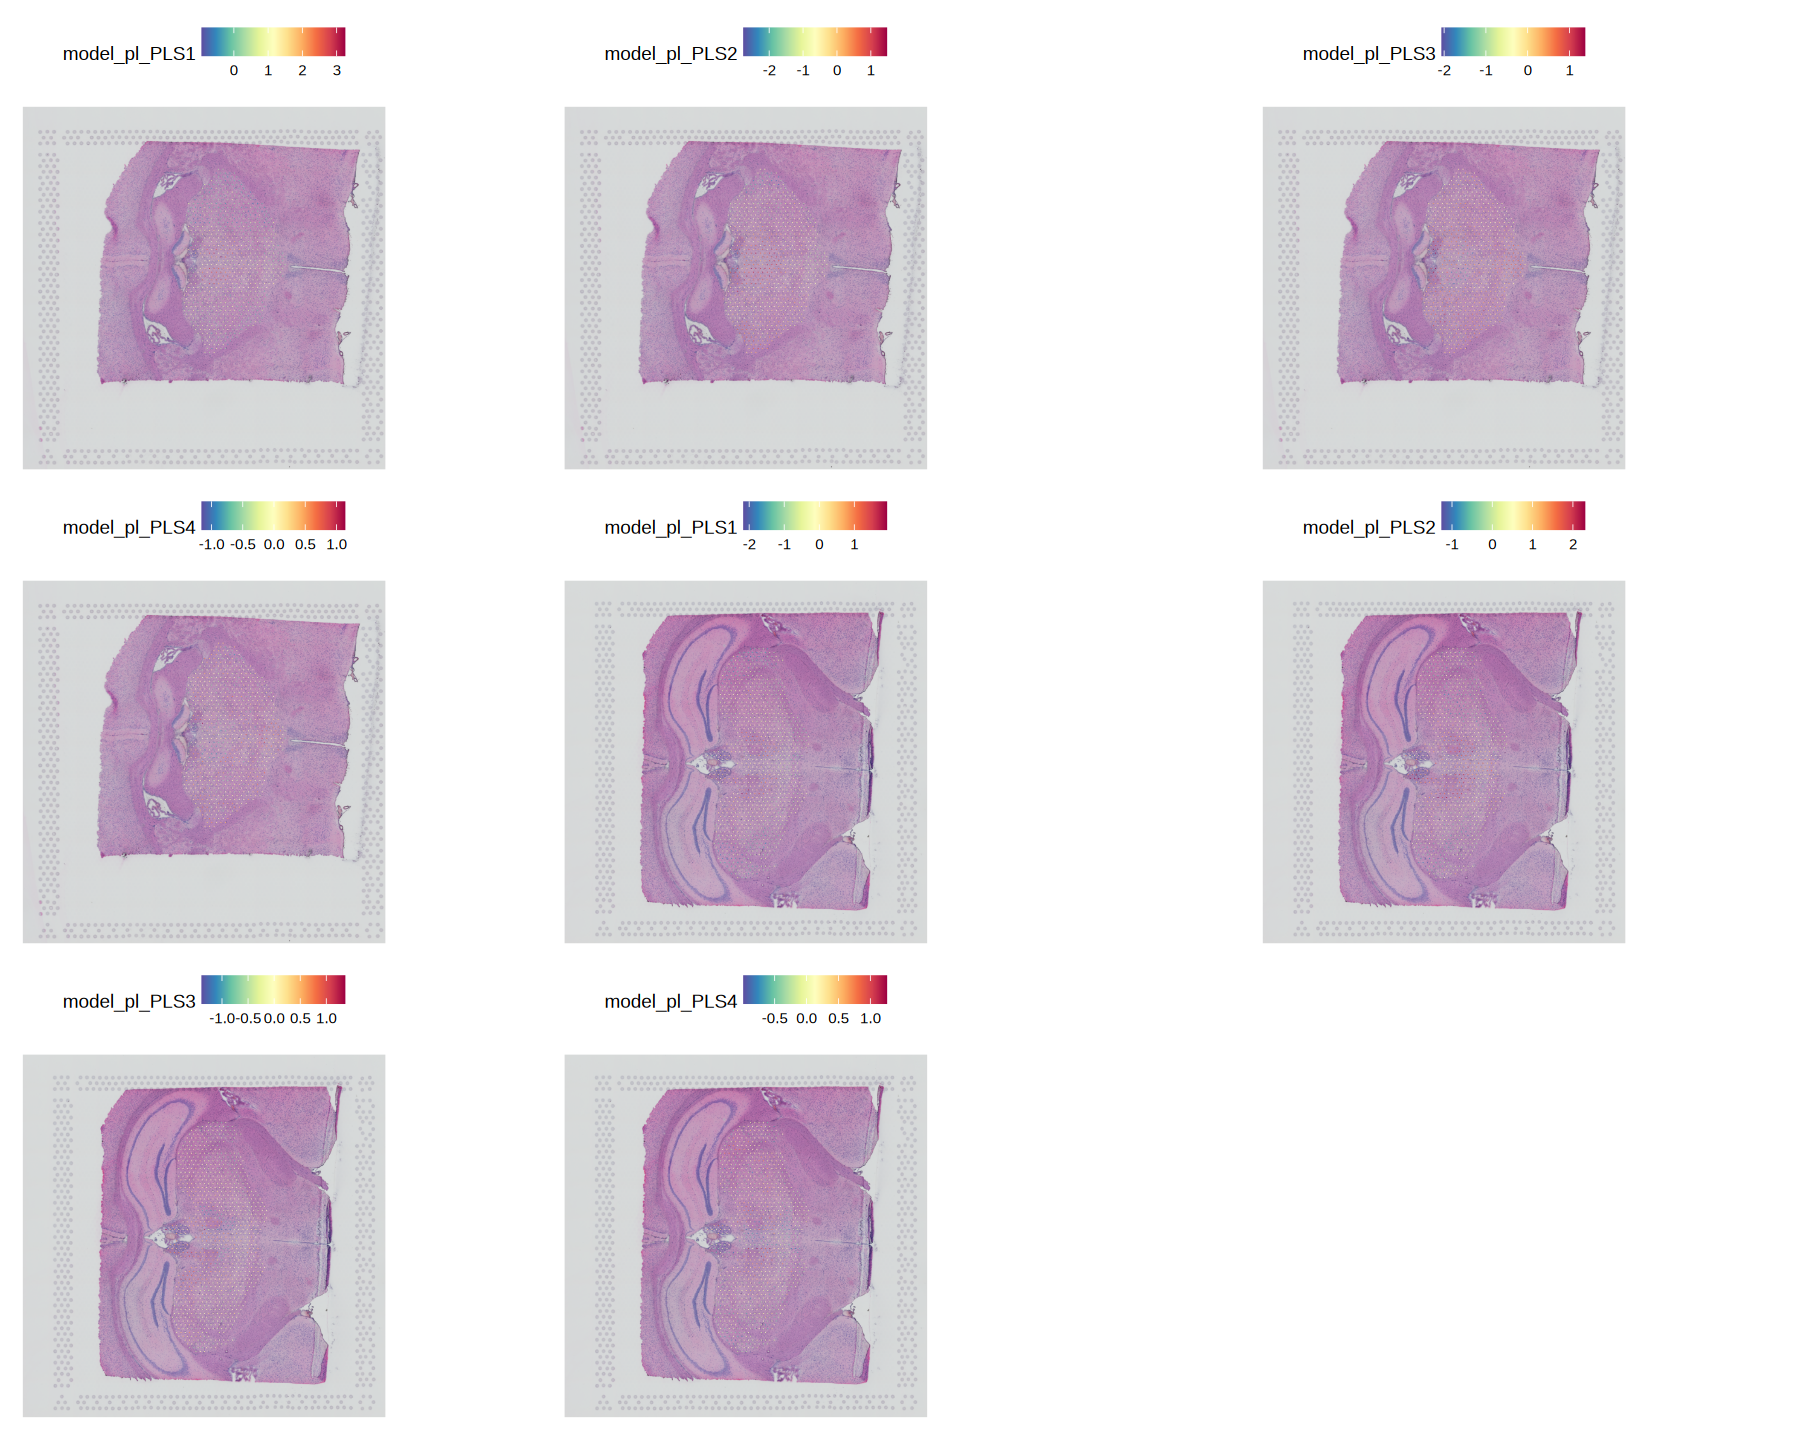

In [513]:
#pdf('./spot_PrL_PLS1-4_overlap_spatial.pdf',width=15,height=12)
options(repr.plot.width=15,repr.plot.height=12)
plot_list <- SpatialFeaturePlot(SUB_test_rostral1_th,features='model_pl_PLS1',crop=FALSE,pt.size.factor = 1)+
SpatialFeaturePlot(SUB_test_rostral1_th,features='model_pl_PLS2',crop=FALSE,pt.size.factor = 1)+
SpatialFeaturePlot(SUB_test_rostral1_th,features='model_pl_PLS3',crop=FALSE,pt.size.factor = 1)+
SpatialFeaturePlot(SUB_test_rostral1_th,features='model_pl_PLS4',crop=FALSE,pt.size.factor = 1)+
SpatialFeaturePlot(SUB_test_caudal1_th,features='model_pl_PLS1',crop=FALSE,pt.size.factor = 1)+
SpatialFeaturePlot(SUB_test_caudal1_th,features='model_pl_PLS2',crop=FALSE,pt.size.factor = 1)+
SpatialFeaturePlot(SUB_test_caudal1_th,features='model_pl_PLS3',crop=FALSE,pt.size.factor = 1)+
SpatialFeaturePlot(SUB_test_caudal1_th,features='model_pl_PLS4',crop=FALSE,pt.size.factor = 1)

print(plot_list)
#dev.off()

In [243]:
library(RColorBrewer)
SpatialColors <- colorRampPalette(colors = rev(x = brewer.pal(n = 11, name = "Spectral")))
library(scales)

Warning message:
“package ‘RColorBrewer’ was built under R version 4.3.3”
Warning message:
“package ‘scales’ was built under R version 4.3.3”


In [ ]:
SUB_test_rostral1_thmodel_sub_PLS1

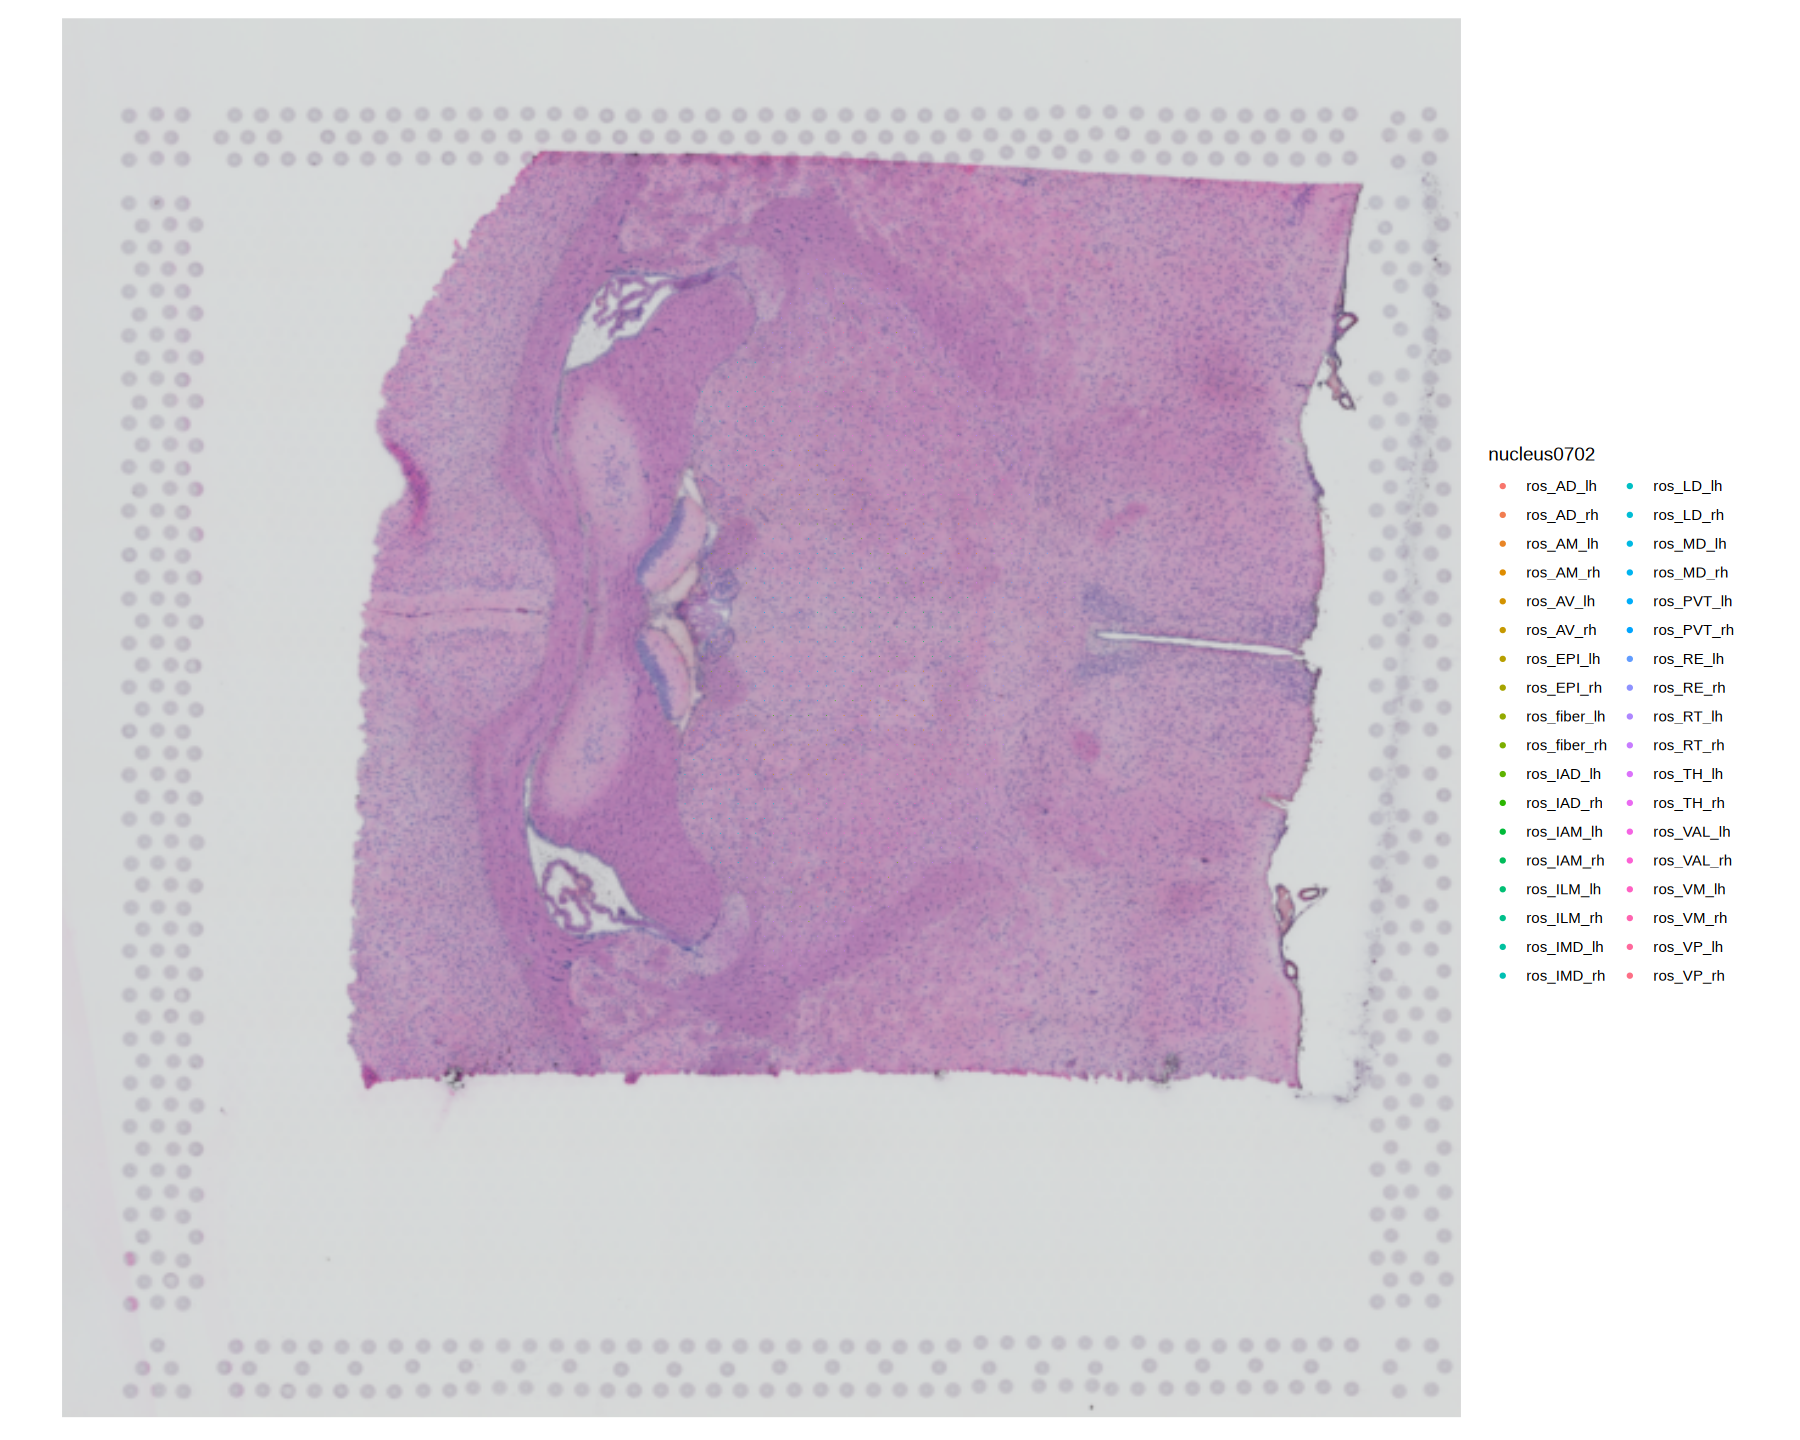

In [343]:
SpatialDimPlot(SUB_test_rostral1_th,group.by='nucleus0702',crop=FALSE,pt.size.factor = 1)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


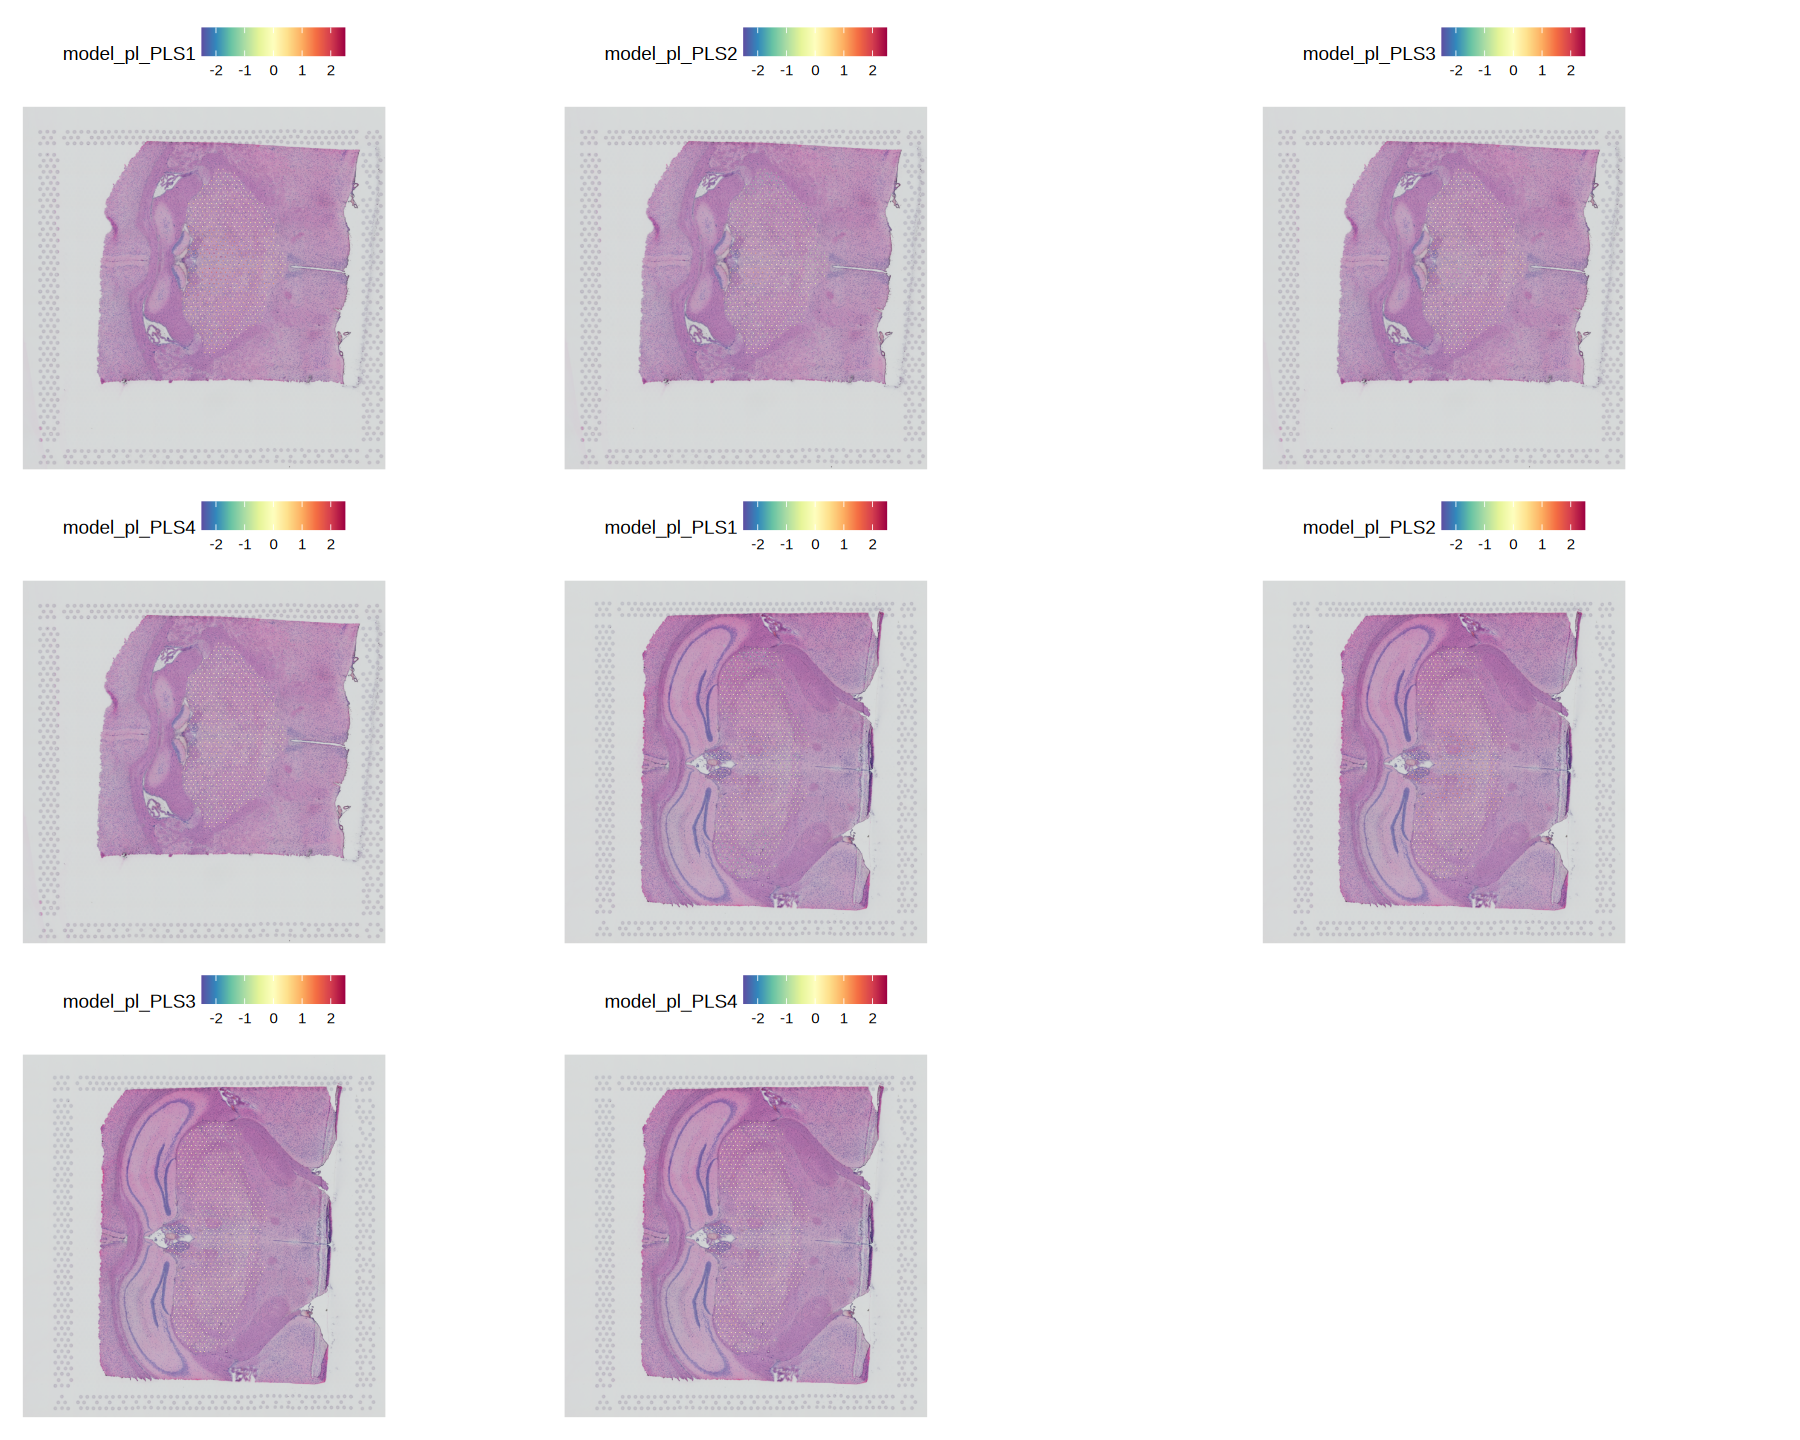

In [335]:
#pdf('./spot_PrL_PLS1-4_overlap_spatial_colorbar.pdf',width=15,height=12)
options(repr.plot.width=15,repr.plot.height=12)
p1 <- SpatialFeaturePlot(SUB_test_rostral1_th,features='model_pl_PLS1',crop=FALSE,pt.size.factor = 1)&
scale_fill_gradientn(limits=c(-2.5, 2.5), colours=SpatialColors(n=100),oob=squish)

p2 <- SpatialFeaturePlot(SUB_test_rostral1_th,features='model_pl_PLS2',crop=FALSE,pt.size.factor = 1)&
scale_fill_gradientn(limits=c(-2.5, 2.5), colours=SpatialColors(n=100),oob=squish)

p3 <- SpatialFeaturePlot(SUB_test_rostral1_th,features='model_pl_PLS3',crop=FALSE,pt.size.factor = 1)&
scale_fill_gradientn(limits=c(-2.5, 2.5), colours=SpatialColors(n=100),oob=squish)

p4 <- SpatialFeaturePlot(SUB_test_rostral1_th,features='model_pl_PLS4',crop=FALSE,pt.size.factor = 1)&
scale_fill_gradientn(limits=c(-2.5, 2.5), colours=SpatialColors(n=100),oob=squish)

p5 <- SpatialFeaturePlot(SUB_test_caudal1_th,features='model_pl_PLS1',crop=FALSE,pt.size.factor = 1)&
scale_fill_gradientn(limits=c(-2.5, 2.5), colours=SpatialColors(n=100),oob=squish)

p6 <- SpatialFeaturePlot(SUB_test_caudal1_th,features='model_pl_PLS2',crop=FALSE,pt.size.factor = 1)&
scale_fill_gradientn(limits=c(-2.5, 2.5), colours=SpatialColors(n=100),oob=squish)

p7 <- SpatialFeaturePlot(SUB_test_caudal1_th,features='model_pl_PLS3',crop=FALSE,pt.size.factor = 1)&
scale_fill_gradientn(limits=c(-2.5, 2.5), colours=SpatialColors(n=100),oob=squish)

p8 <- SpatialFeaturePlot(SUB_test_caudal1_th,features='model_pl_PLS4',crop=FALSE,pt.size.factor = 1)&
scale_fill_gradientn(limits=c(-2.5, 2.5), colours=SpatialColors(n=100),oob=squish)

p1+p2+p3+p4+p5+p6+p7+p8
#dev.off()

In [328]:
pdf('./spot_SUB_PLS1-12_overlap_spatial.pdf', width=20, height=20)
options(repr.plot.width=20, repr.plot.height=20)
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS1', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS2', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS3', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS4', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS5', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS6', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS7', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS8', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS9', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS10', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS11', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS12', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS1', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS2', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS3', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS4', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS5', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS6', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS7', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS8', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS9', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS10', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS11', crop=FALSE, pt.size.factor = 1) +
SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS12', crop=FALSE, pt.size.factor = 1)
dev.off()

pdf 
  2

In [329]:
pdf('./spot_SUB_PLS1-12_overlap_spatial_colorbar.pdf', width=20, height=20)
options(repr.plot.width=20, repr.plot.height=20)

# Rostral PLS1-5
p1 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS1', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p2 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS2', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p3 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS3', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p4 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS4', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p5 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS5', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

# Rostral PLS6-12
p6 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS6', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p7 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS7', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p8 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS8', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p9 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS9', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p10 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS10', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p11 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS11', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p12 <- SpatialFeaturePlot(SUB_test_rostral1_th, features='model_sub_PLS12', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

# Caudal PLS1-5
p13 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS1', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p14 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS2', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p15 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS3', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p16 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS4', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p17 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS5', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

# Caudal PLS6-12
p18 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS6', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p19 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS7', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p20 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS8', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p21 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS9', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p22 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS10', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p23 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS11', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

p24 <- SpatialFeaturePlot(SUB_test_caudal1_th, features='model_sub_PLS12', crop=FALSE, pt.size.factor = 1) &
  scale_fill_gradientn(limits=c(-1.5, 1.5), colours=SpatialColors(n=100), oob=squish)

(p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9 + p10 + p11 + p12 + p13 + p14 + p15 + p16 + p17 + p18 + p19 + p20 + p21 + p22 + p23 + p24)
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale

pdf 
  2

## PLS correlation

In [135]:
corr_pl <- data.frame(cor(X_pl_scaled_o$ofmri_activation,X_scores_pl))
corr_pl <- data.frame(t(corr_pl))

In [137]:
pdf('./spot_PrL_correlation_between_ofmri_Xscores_vip15.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)
plot(corr_pl$t.corr_pl.,xlim=c(0,30),ylim=c(0,1), xlab = "Component N", ylab = "Correlation",
     main="Correlation between ofmri and X scores")
dev.off()

pdf 
  2

In [138]:
corr_sub <- data.frame(cor(X_sub_scaled_o$ofmri_activation,X_scores_sub))
corr_sub <- data.frame(t(corr_sub))

In [139]:
pdf('./spot_SUB_correlation_between_ofmri_Xscores_vip15.pdf',width=6,height=6)
options(repr.plot.width=6,repr.plot.height=6)
plot(corr_sub$t.corr_sub.,xlim=c(0,30),ylim=c(0,1), xlab = "Component N", ylab = "Correlation",
     main="Correlation between ofmri and X scores")
dev.off()

pdf 
  2

## prediction

### PrL with proj&tarp model  predict pl sample

In [144]:
colnames(testX_pl168_scaled )[colnames(testX_pl168_scaled ) == "PrL_proj"] <- "proj"
colnames(testX_pl168_scaled )[colnames(testX_pl168_scaled ) == "PrL_trap"] <- "trap"

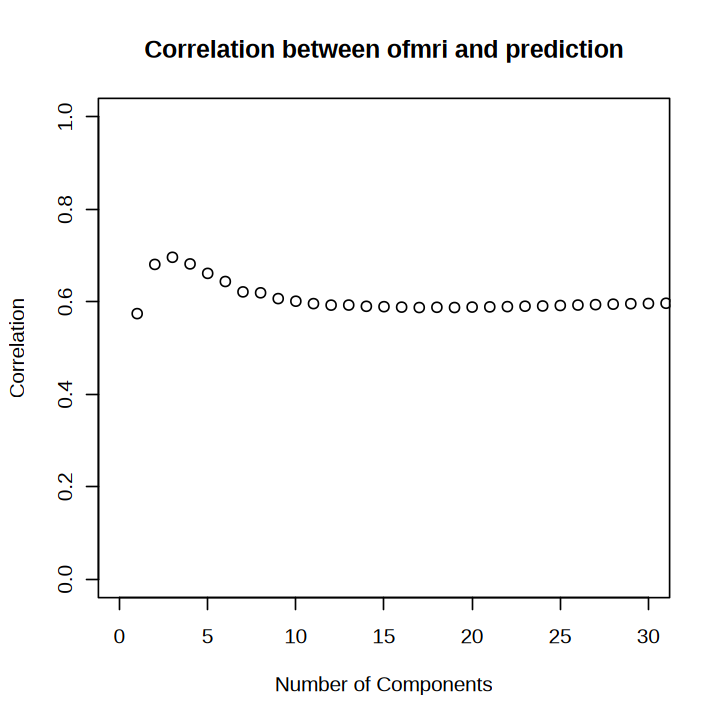

In [145]:
testX_pl168_scaled_o <- testX_pl168_scaled[,c(spot_pl_overlap,'proj','trap')]
result168 <- testofmri_pl168_scaled
result168$ofmri_10x_activation <- NULL
for(i in 1:100){
    res <- predict(model_pl,ncomp=i,newdata=testX_pl168_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result168 <- cbind(result168,res)
}
predcor168 <- data.frame(cor(result168))
predcor168$ncomp <- rownames(predcor168)
predcor168 <- predcor168[,c('ncomp','ofmri_activation')]
predcor168 <- predcor168[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor168$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE168 <- data.frame(colMeans((result168$ofmri_activation - result168)^2))
RMSE168 <- sqrt(MSE168)
write.csv(predcor168,'./spot_PrL168correlation_between_ofmri_prediction_overlapmodel_vip15.csv')
write.csv(result168,'./spot_PrL168pred_overlapmodel_result_vip15.csv')
write.csv(MSE168,'./spot_PrL168pred_overlapmodel_MSE_vip15.csv')
write.csv(RMSE168,'./spot_PrL168pred_overlapmodel_RMSE_vip15.csv')

In [146]:
colnames(testX_pl201_scaled )[colnames(testX_pl201_scaled ) == "PrL_proj"] <- "proj"
colnames(testX_pl201_scaled )[colnames(testX_pl201_scaled ) == "PrL_trap"] <- "trap"

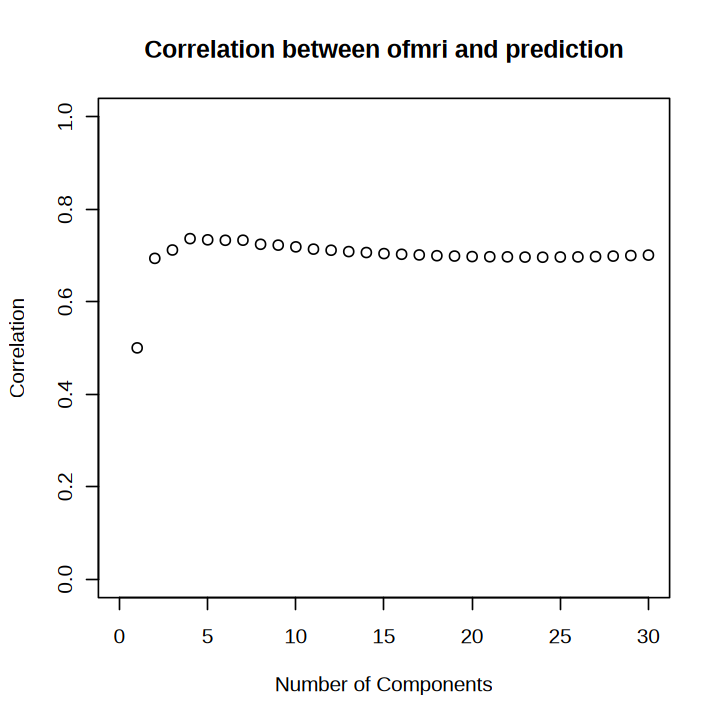

In [148]:
testX_pl201_scaled_o <- testX_pl201_scaled[,c(spot_pl_overlap,'proj','trap')]
result201 <- testofmri_pl201_scaled
result201$ofmri_10x_activation <- NULL
for(i in 1:30){
    res <- predict(model_pl,ncomp=i,newdata=testX_pl201_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result201 <- cbind(result201,res)
}
predcor201 <- data.frame(cor(result201))
predcor201$ncomp <- rownames(predcor201)
predcor201 <- predcor201[,c('ncomp','ofmri_activation')]
predcor201 <- predcor201[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor201$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE201 <- data.frame(colMeans((result201$ofmri_activation - result201)^2))
RMSE201 <- sqrt(MSE201)
write.csv(predcor201,'./spot_PrL201correlation_between_ofmri_prediction_vip15.csv')
write.csv(result201,'./spot_PrL201pred_overlapmodel_result_vip15.csv')
write.csv(MSE201,'./spot_PrL201pred_overlapmodel_MSE_vip15.csv')
write.csv(RMSE201,'./spot_PrL201pred_overlapmodel_RMSE_vip15.csv')

In [152]:
colnames(testX_pl186_scaled )[colnames(testX_pl186_scaled ) == "PrL_proj"] <- "proj"
colnames(testX_pl186_scaled )[colnames(testX_pl186_scaled ) == "PrL_trap"] <- "trap"

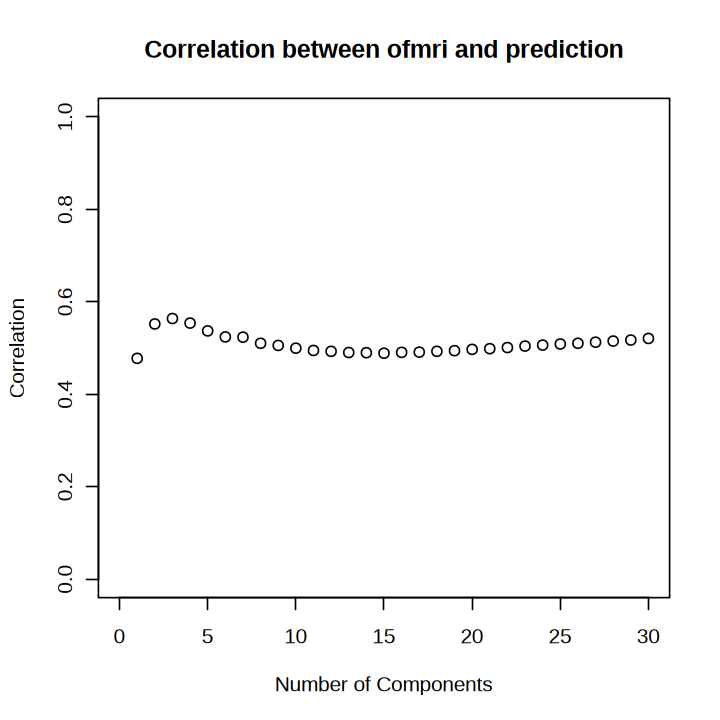

In [153]:
testX_pl186_scaled_o <- testX_pl186_scaled[,c(spot_pl_overlap,'proj','trap')]
result186 <- testofmri_pl186_scaled
result186$ofmri_10x_activation <- NULL
for(i in 1:30){
    res <- predict(model_pl,ncomp=i,newdata=testX_pl186_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result186 <- cbind(result186,res)
}
predcor186 <- data.frame(cor(result186))
predcor186$ncomp <- rownames(predcor186)
predcor186 <- predcor186[,c('ncomp','ofmri_activation')]
predcor186 <- predcor186[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor186$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE186 <- data.frame(colMeans((result186$ofmri_activation - result186)^2))
RMSE186 <- sqrt(MSE186)
write.csv(predcor186,'./spot_PrL186correlation_between_ofmri_prediction_overlapmodel_vip1.csv')
write.csv(result186,'./spot_PrL186pred_overlapmodel_result_vip1.csv')
write.csv(MSE186,'./spot_PrL186pred_overlapmodel_MSE_vip1.csv')
write.csv(RMSE186,'./spot_PrL186pred_overlapmodel_RMSE_vip1.csv')

### Prl with proj&tarp model predict sub sample

In [156]:
colnames(testX_sub191_scaled )[colnames(testX_sub191_scaled ) == "SUB_proj"] <- "proj"
colnames(testX_sub191_scaled )[colnames(testX_sub191_scaled ) == "SUB_trap"] <- "trap"

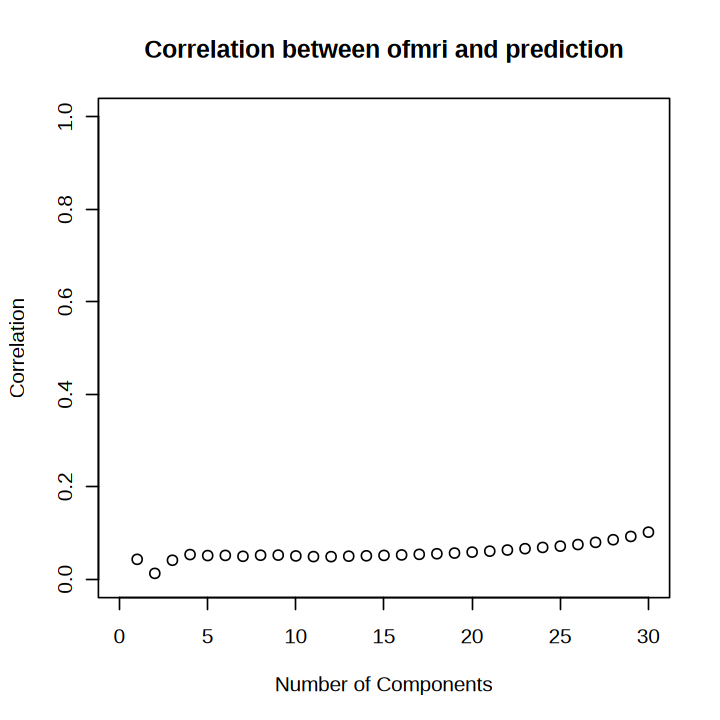

In [159]:
testX_sub191_pl_scaled_o <- testX_sub191_scaled[,c(spot_pl_overlap,'proj','trap')]
result191_pl <- testofmri_sub191_scaled
result191_pl$ofmri_10x_activation <- NULL
for(i in 1:30){
    res <- predict(model_pl,ncomp=i,newdata=testX_sub191_pl_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result191_pl <- cbind(result191_pl,res)
}
predcor191_pl <- data.frame(cor(result191_pl))
predcor191_pl$ncomp <- rownames(predcor191_pl)
predcor191_pl <- predcor191_pl[,c('ncomp','ofmri_activation')]
predcor191_pl <- predcor191_pl[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor191_pl$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE191_pl <- data.frame(colMeans((result191_pl$ofmri_activation - result191_pl)^2))
RMSE191_pl <- sqrt(MSE191_pl)
#write.csv(predcor191,'./spot_SUB191correlation_between_ofmri_prediction_overlapmodel_vip1.csv')
#write.csv(result191,'./spot_SUB191pred_overlapmodel_result_vip1.csv')
#write.csv(MSE191,'./spot_SUB191pred_overlapmodel_MSE_vip1.csv')
#write.csv(RMSE191,'./spot_SUB191pred_overlapmodel_RMSE_vip1.csv')

In [160]:
colnames(testX_sub193_scaled )[colnames(testX_sub193_scaled ) == "SUB_proj"] <- "proj"
colnames(testX_sub193_scaled )[colnames(testX_sub193_scaled ) == "SUB_trap"] <- "trap"

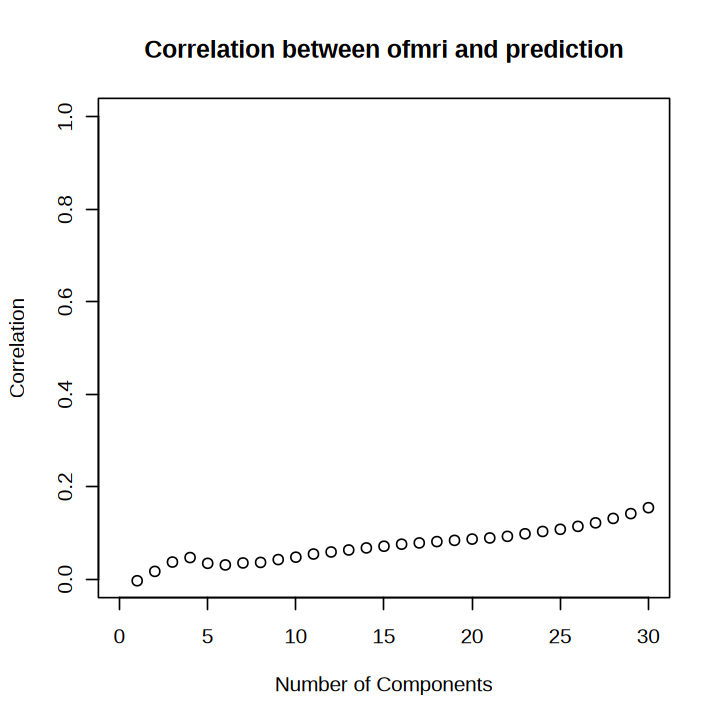

In [161]:
testX_sub193_pl_scaled_o <- testX_sub193_scaled[,c(spot_pl_overlap,'proj','trap')]
result193_pl <- testofmri_sub193_scaled
result193_pl$ofmri_10x_activation <- NULL
for(i in 1:30){
    res <- predict(model_pl,ncomp=i,newdata=testX_sub193_pl_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result193_pl <- cbind(result193_pl,res)
}
predcor193_pl <- data.frame(cor(result193_pl))
predcor193_pl$ncomp <- rownames(predcor193_pl)
predcor193_pl <- predcor193_pl[,c('ncomp','ofmri_activation')]
predcor193_pl <- predcor193_pl[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor193_pl$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE193_pl <- data.frame(colMeans((result193_pl$ofmri_activation - result193_pl)^2))
RMSE193_pl <- sqrt(MSE193_pl)

# 保存结果到CSV文件
#write.csv(predcor193_pl,'./spot_SUB193correlation_between_ofmri_prediction_overlapmodel_vip1.csv')
#write.csv(result193_pl,'./spot_SUB193pred_overlapmodel_result_vip1.csv')
#write.csv(MSE193_pl,'./spot_SUB193pred_overlapmodel_MSE_vip1.csv')
#write.csv(RMSE193_pl,'./spot_SUB193pred_overlapmodel_RMSE_vip1.csv')

### SUB with proj&tarp model  predict sub sample

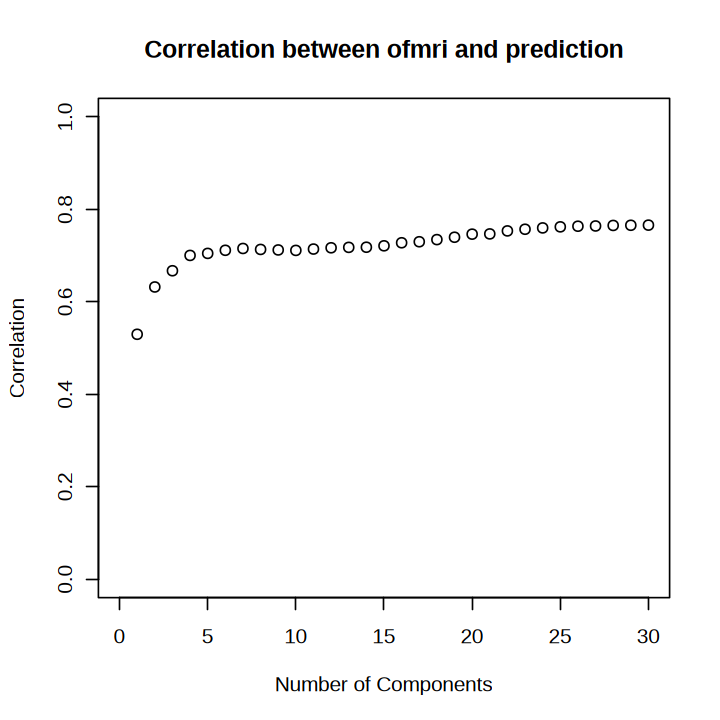

In [162]:
testX_sub191_scaled_o <- testX_sub191_scaled[,c(spot_sub_overlap,'proj','trap')]
result191 <- testofmri_sub191_scaled
result191$ofmri_10x_activation <- NULL
for(i in 1:30){
    res <- predict(model_sub,ncomp=i,newdata=testX_sub191_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result191 <- cbind(result191,res)
}
predcor191 <- data.frame(cor(result191))
predcor191$ncomp <- rownames(predcor191)
predcor191 <- predcor191[,c('ncomp','ofmri_activation')]
predcor191 <- predcor191[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor191$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE191 <- data.frame(colMeans((result191$ofmri_activation - result191)^2))
RMSE191 <- sqrt(MSE191)
#write.csv(predcor191,'./spot_SUB191correlation_between_ofmri_prediction_overlapmodel_vip15.csv')
#write.csv(result191,'./spot_SUB191pred_overlapmodel_result_vip15.csv')
#write.csv(MSE191,'./spot_SUB191pred_overlapmodel_MSE_vip15.csv')
#write.csv(RMSE191,'./spot_SUB191pred_overlapmodel_RMSE_vip15.csv')

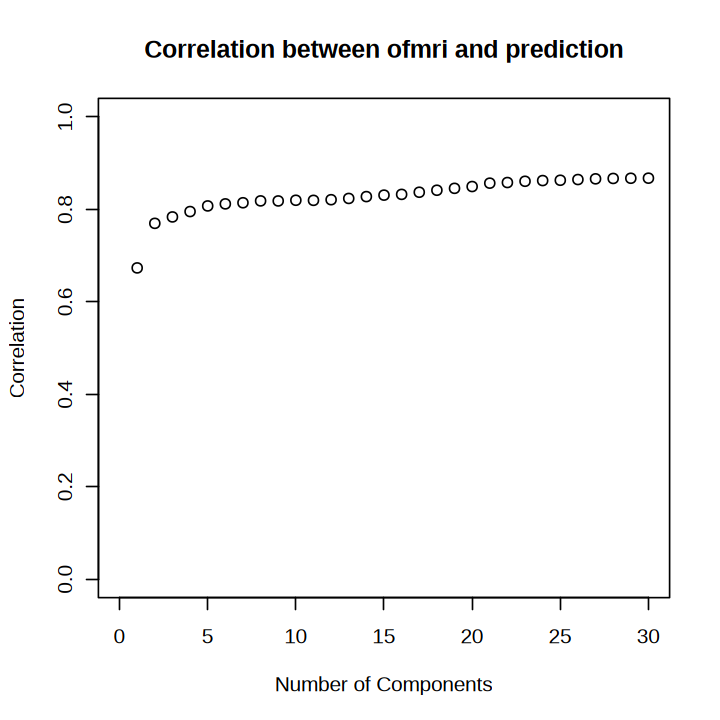

In [164]:
testX_sub193_scaled_o <- testX_sub193_scaled[,c(spot_sub_overlap,'proj','trap')]
result193 <- testofmri_sub193_scaled
result193$ofmri_10x_activation <- NULL
for(i in 1:30){
    res <- predict(model_sub,ncomp=i,newdata=testX_sub193_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result193 <- cbind(result193,res)
}
predcor193 <- data.frame(cor(result193))
predcor193$ncomp <- rownames(predcor193)
predcor193 <- predcor193[,c('ncomp','ofmri_activation')]
predcor193 <- predcor193[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor193$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE193 <- data.frame(colMeans((result193$ofmri_activation - result193)^2))
RMSE193 <- sqrt(MSE193)
write.csv(predcor193,'./spot_SUB193correlation_between_ofmri_prediction_overlapmodel_vip15.csv')
write.csv(result193,'./spot_SUB193pred_overlapmodel_result_vip15.csv')
write.csv(MSE193,'./spot_SUB193pred_overlapmodel_MSE_vip15.csv')
write.csv(RMSE193,'./spot_SUB193pred_overlapmodel_RMSE_vip15.csv')

### SUB with proj&tarp model predict pl sample

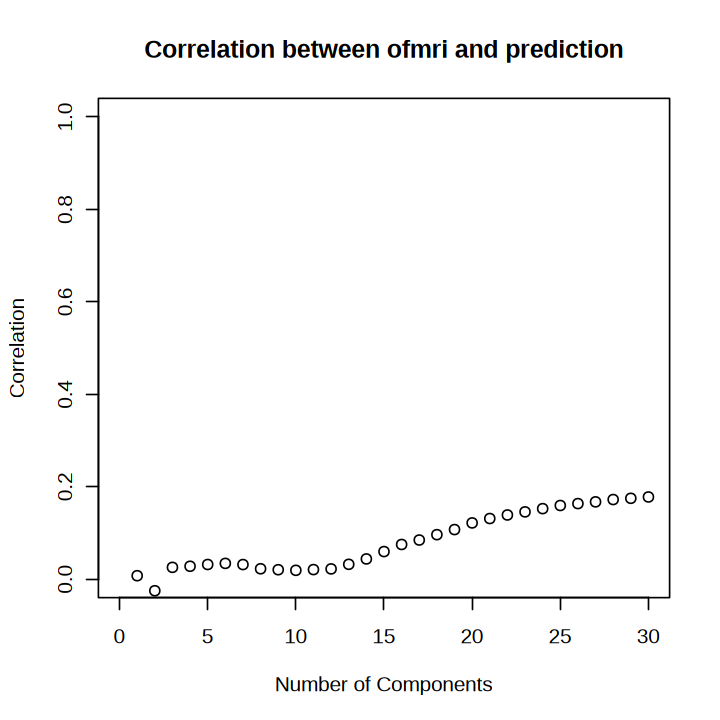

In [165]:
testX_pl168_sub_scaled_o <- testX_pl168_scaled[,c(spot_sub_overlap,'proj','trap')]
result168_sub <- testofmri_pl168_scaled
result168_sub$ofmri_10x_activation <- NULL
for(i in 1:30){
    res <- predict(model_sub,ncomp=i,newdata=testX_pl168_sub_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result168_sub <- cbind(result168_sub,res)
}
predcor168_sub <- data.frame(cor(result168_sub))
predcor168_sub$ncomp <- rownames(predcor168_sub)
predcor168_sub <- predcor168_sub[,c('ncomp','ofmri_activation')]
predcor168_sub <- predcor168_sub[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor168_sub$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE168_sub <- data.frame(colMeans((result168_sub$ofmri_activation - result168_sub)^2))
RMSE168_sub <- sqrt(MSE168_sub)
#write.csv(predcor168,'./spot_PrL168correlation_between_ofmri_prediction_overlapmodel_vip1.csv')
#write.csv(result168,'./spot_PrL168pred_overlapmodel_result_vip1.csv')
#write.csv(MSE168,'./spot_PrL168pred_overlapmodel_MSE_vip1.csv')
#write.csv(RMSE168,'./spot_PrL168pred_overlapmodel_RMSE_vip1.csv')

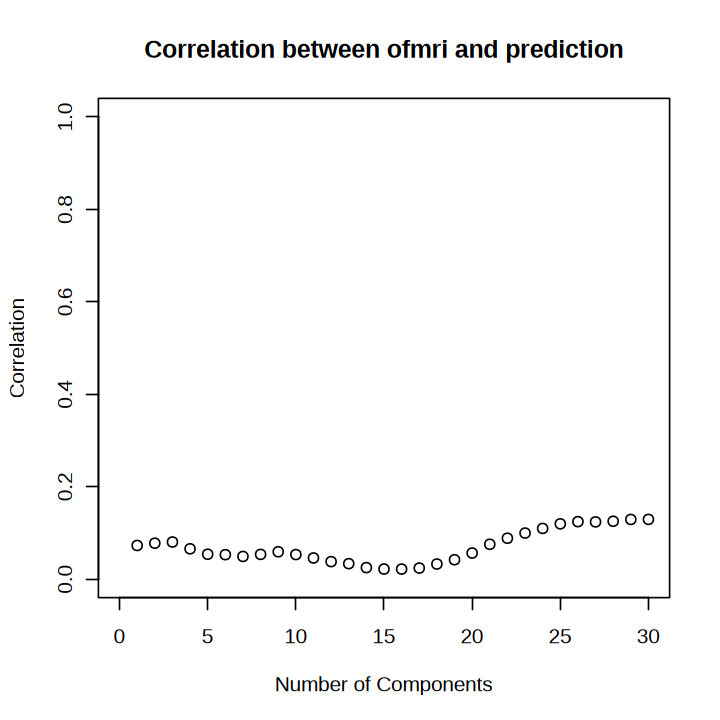

In [166]:
testX_pl201_sub_scaled_o <- testX_pl201_scaled[,c(spot_sub_overlap,'proj','trap')]
result201_sub <- testofmri_pl201_scaled
result201_sub$ofmri_10x_activation <- NULL
for(i in 1:30){
    res <- predict(model_sub,ncomp=i,newdata=testX_pl201_sub_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result201_sub <- cbind(result201_sub,res)
}
predcor201_sub <- data.frame(cor(result201_sub))
predcor201_sub$ncomp <- rownames(predcor201_sub)
predcor201_sub <- predcor201_sub[,c('ncomp','ofmri_activation')]
predcor201_sub <- predcor201_sub[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor201_sub$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE201_sub <- data.frame(colMeans((result201_sub$ofmri_activation - result201_sub)^2))
RMSE201_sub <- sqrt(MSE201_sub)

# 保存结果到CSV文件
#write.csv(predcor201_sub,'./spot_PrL201correlation_between_ofmri_prediction_overlapmodel_vip1.csv')
#write.csv(result201_sub,'./spot_PrL201pred_overlapmodel_result_vip1.csv')
#write.csv(MSE201_sub,'./spot_PrL201pred_overlapmodel_MSE_vip1.csv')
#write.csv(RMSE201_sub,'./spot_PrL201pred_overlapmodel_RMSE_vip1.csv')

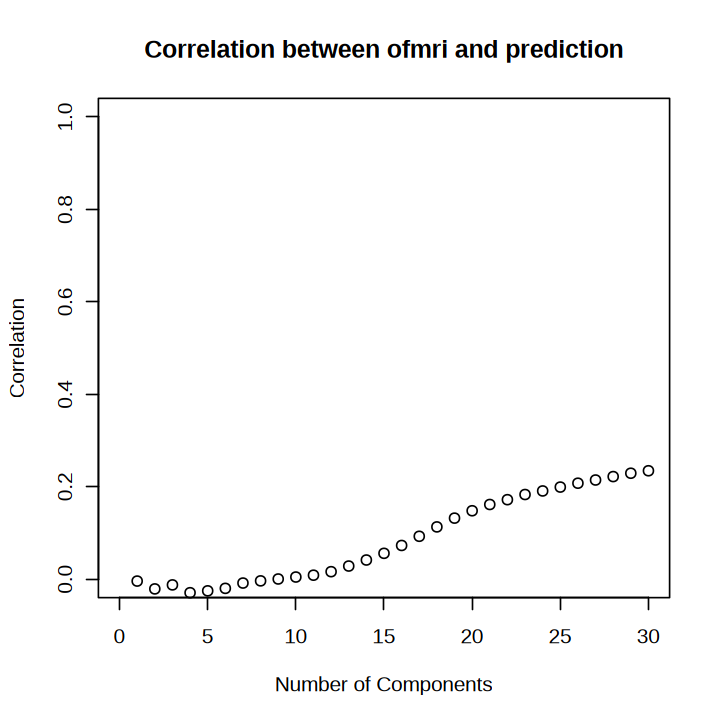

In [172]:
testX_pl186_sub_scaled_o <- testX_pl186_scaled[,c(spot_sub_overlap,'proj','trap')]
result186_sub <- testofmri_pl186_scaled
result186_sub$ofmri_10x_activation <- NULL
for(i in 1:30){
    res <- predict(model_sub,ncomp=i,newdata=testX_pl186_sub_scaled_o)
    res <- data.frame(res)
    colnames(res) <- paste0('ncomp',i)
    result186_sub <- cbind(result186_sub,res)
}
predcor186_sub <- data.frame(cor(result186_sub))
predcor186_sub$ncomp <- rownames(predcor186_sub)
predcor186_sub <- predcor186_sub[,c('ncomp','ofmri_activation')]
predcor186_sub <- predcor186_sub[-1,]
options(repr.plot.width=6,repr.plot.height=6)
plot(predcor186_sub$ofmri_activation,xlim=c(0,30),ylim=c(0,1), xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between ofmri and prediction")
MSE186_sub <- data.frame(colMeans((result186_sub$ofmri_activation - result186_sub)^2))
RMSE186_sub <- sqrt(MSE186_sub)

# 保存结果到CSV文件
#write.csv(predcor186_sub,'./spot_PrL186correlation_between_ofmri_prediction_overlapmodel_vip1.csv')
#write.csv(result186_sub,'./spot_PrL186pred_overlapmodel_result_vip1.csv')
#write.csv(MSE186_sub,'./spot_PrL186pred_overlapmodel_MSE_vip1.csv')
#write.csv(RMSE186_sub,'./spot_PrL186pred_overlapmodel_RMSE_vip1.csv')

### merge figure

In [183]:
pdf('./spot_PrL_3modelcorrelation_between_ofmri_prediction_vip15.pdf',width=7,height=6)
data <- data.frame(cbind(predcor168$ofmri_activation[1:30], 
                         predcor201$ofmri_activation[1:30], 
                         predcor186$ofmri_activation[1:30],
                         predcor191_pl$ofmri_activation[1:30], 
                         predcor193_pl$ofmri_activation[1:30]))
colnames(data) <- c('PrL168','PrL201','PrL186','SUB191','SUB193')
options(repr.plot.width=7,repr.plot.height=6)
Col.rar1 <- c("#3CB371", "#90EE90", "#229954", "#6A5ACD", "#87CEFA")
plot(1:30, data[,1], ylim=c(-0.1,1), type="l", col=Col.rar1[1],
     xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between empirical&predicted fMRI of PrL model")

lapply(seq_along(Col.rar1),function(i){
  lines(1:30, data[,i], col=Col.rar1[i])
  points(1:30, data[,i],pch=20, col=Col.rar1[i])  # this is optional
})

# 将图例放置在图外面
legend("topright", legend = c("PrL168", "PrL201", "PrL186",'SUB191','SUB193'), 
       col = c(Col.rar1[1], Col.rar1[2], Col.rar1[3], Col.rar1[4], Col.rar1[5]), 
       lty = 1, bty = "n") # bty = "n" 表示不绘制图例框

dev.off()

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

pdf 
  2

In [184]:
pdf('./spot_SUB_2modelcorrelation_between_ofmri_prediction_vip15.pdf',width=7,height=6)
data <- data.frame(cbind(predcor168_sub$ofmri_activation[0:30], 
                         predcor201_sub$ofmri_activation[0:30], 
                         predcor186_sub$ofmri_activation[0:30],
                         predcor191$ofmri_activation[0:30], 
                         predcor193$ofmri_activation[0:30]))
colnames(data) <- c('PrL168','PrL201','PrL186','SUB191','SUB193')
options(repr.plot.width=7,repr.plot.height=6)
Col.rar1 <- c("#3CB371", "#90EE90", "#229954", "#6A5ACD", "#87CEFA")
plot(1:30, data[,1], ylim=c(-0.1,1), type="l", col=Col.rar1[1],
     xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between empirical&predicted fMRI of SUB model")

lapply(seq_along(Col.rar1),function(i){
  lines(1:30, data[,i], col=Col.rar1[i])
  points(1:30, data[,i],pch=20, col=Col.rar1[i])  # this is optional
})

# 将图例放置在图外面
legend("topright", legend = c("PrL168", "PrL201", "PrL186",'SUB191','SUB193'), 
       col = c(Col.rar1[1], Col.rar1[2], Col.rar1[3], Col.rar1[4], Col.rar1[5]), 
       lty = 1, bty = "n") # bty = "n" 表示不绘制图例框
dev.off()

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

pdf 
  2

In [188]:
result168$ofmri_activation168 <- result168$ofmri_activation
result201$ofmri_activation201 <- result201$ofmri_activation
result186$ofmri_activation186 <- result186$ofmri_activation
result168$ncomp5_168 <- result168$ncomp5
result201$ncomp5_201 <- result201$ncomp5
result186$ncomp5_186 <- result186$ncomp5
result191_pl$ofmri_activation191 <- result191_pl$ofmri_activation
result193_pl$ofmri_activation193 <- result193_pl$ofmri_activation
result191_pl$ncomp5_191 <- result191_pl$ncomp5
result193_pl$ncomp5_193 <- result193_pl$ncomp5

In [189]:
result191$ofmri_activation191 <- result191$ofmri_activation
result193$ofmri_activation193 <- result193$ofmri_activation
result191$ncomp7_191 <- result191$ncomp7
result193$ncomp7_193 <- result193$ncomp7

result168_sub$ofmri_activation168 <- result168_sub$ofmri_activation
result201_sub$ofmri_activation201 <- result201_sub$ofmri_activation
result186_sub$ofmri_activation186 <- result186_sub$ofmri_activation
result168_sub$ncomp7_168 <- result168_sub$ncomp7
result201_sub$ncomp7_201 <- result201_sub$ncomp7
result186_sub$ncomp7_186 <- result186_sub$ncomp7

In [209]:
data <- data.frame(cbind(
  result168$ofmri_activation168, result201$ofmri_activation201, result186$ofmri_activation186,
  result191_pl$ofmri_activation191, result193_pl$ofmri_activation193,
  result168$ncomp5_168, result201$ncomp5_201, result186$ncomp5_186,
  result191_pl$ncomp5_191, result193_pl$ncomp5_193
))
colnames(data) <- c('ofmri168','ofmri201','ofmri186','ofmri191','ofmri193','ncomp168','ncomp201','ncomp186','ncomp191','ncomp193')
colors <- c("PrL168" = "#3CB371", "PrL201" = "#90EE90", "PrL186" = "#229954", 
            "SUB191" = "#6A5ACD50", "SUB193" = "#87CEFA50") # 增加了alpha值来调整透明度

pdf('./spot_PrLmodel_predict_scatter_vip15.pdf',width=8,height=8)
options(repr.plot.width=8,repr.plot.height=8)
ggplot(data) +
  geom_point(aes(x=ncomp191, y=ofmri191, color='SUB191')) +
  geom_smooth(aes(x=ncomp191, y=ofmri191, color='SUB191'), method="lm", se=TRUE) +
  geom_point(aes(x=ncomp193, y=ofmri193, color='SUB193')) +
  geom_smooth(aes(x=ncomp193, y=ofmri193, color='SUB193'), method="lm", se=TRUE) +
  geom_point(aes(x=ncomp168, y=ofmri168, color='PrL168')) +
  geom_smooth(aes(x=ncomp168, y=ofmri168, color='PrL168'), method="lm", se=TRUE) +
  geom_point(aes(x=ncomp201, y=ofmri201, color='PrL201')) +
  geom_smooth(aes(x=ncomp201, y=ofmri201, color='PrL201'), method="lm", se=TRUE) +
  geom_point(aes(x=ncomp186, y=ofmri186, color='PrL186')) +
  geom_smooth(aes(x=ncomp186, y=ofmri186, color='PrL186'), method="lm", se=TRUE) +
  xlab('prediction') +
  ylab('true value') +
  scale_color_manual(values=colors) +
  theme_classic()
dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


pdf 
  2

In [210]:
coefficients <- data.frame(
  PrL168 = cor(data$ncomp168, data$ofmri168),
  PrL201 = cor(data$ncomp201, data$ofmri201),
  PrL186 = cor(data$ncomp186, data$ofmri186),
  SUB191 = cor(data$ncomp191, data$ofmri191),
  SUB193 = cor(data$ncomp193, data$ofmri193)
)
rownames(coefficients) <- 'PRLmodel'
write.csv(coefficients, file = "./PRLmodel_5comp_predict_coefficients_vip15.csv")

In [211]:
coefficients

PrL168    PrL201    PrL186    SUB191    SUB193    
PRLmodel 0.6614581 0.7340465 0.5369759 0.0509354 0.03414919

In [ ]:
result191$ofmri_activation191 <- result191$ofmri_activation
result193$ofmri_activation193 <- result193$ofmri_activation
result191$ncomp7_191 <- result191$ncomp7
result193$ncomp7_193 <- result193$ncomp7

result168_sub$ofmri_activation168 <- result168_sub$ofmri_activation
result201_sub$ofmri_activation201 <- result201_sub$ofmri_activation
result186_sub$ofmri_activation186 <- result186_sub$ofmri_activation
result168_sub$ncomp7_168 <- result168_sub$ncomp7
result201_sub$ncomp7_201 <- result201_sub$ncomp7
result186_sub$ncomp7_186 <- result186_sub$ncomp7

In [212]:
data <- data.frame(cbind(result168_sub$ofmri_activation168, result201_sub$ofmri_activation201, result186_sub$ofmri_activation186,result191$ofmri_activation191,result193$ofmri_activation193,
                         result168_sub$ncomp7_168, result201_sub$ncomp7_201,result186_sub$ncomp7_186,result191$ncomp7_191,result193$ncomp7_193))

colnames(data) <- c('ofmri168','ofmri201','ofmri186','ofmri191','ofmri193','ncomp168','ncomp201','ncomp186','ncomp191','ncomp193')
pdf('./spot_SUBmodel_predict_scatter_vip15.pdf',width=8,height=8)
colors <- c("PrL168" = "#3CB37150", "PrL201" = "#90EE9050", "PrL186" = "#22995430","SUB191" = "#6A5ACD", "SUB193" = "#87CEFA")
options(repr.plot.width=8,repr.plot.height=8)
ggplot(data)+
geom_point(aes(x=ncomp168,y=ofmri168,color='PrL168'))+
geom_smooth(aes(x=ncomp168,y=ofmri168,color='PrL168'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp201,y=ofmri201,color='PrL201'))+
geom_smooth(aes(x=ncomp201,y=ofmri201,color='PrL201'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp186,y=ofmri186,color='PrL186'))+
geom_smooth(aes(x=ncomp186,y=ofmri186,color='PrL186'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp191,y=ofmri191,color='SUB191'))+
geom_smooth(aes(x=ncomp191,y=ofmri191,color='SUB191'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp193,y=ofmri193,color='SUB193'))+
geom_smooth(aes(x=ncomp193,y=ofmri193,color='SUB193'),method="lm",se=TRUE)+
xlab('prediction')+
ylab('true value')+
scale_color_manual(values=colors)+
theme_classic()
dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


pdf 
  2

In [213]:
coefficients <- data.frame(
  PrL168 = cor(data$ncomp168, data$ofmri168),
  PrL201 = cor(data$ncomp201, data$ofmri201),
  PrL186 = cor(data$ncomp186, data$ofmri186),
  SUB191 = cor(data$ncomp191, data$ofmri191),
  SUB193 = cor(data$ncomp193, data$ofmri193)
)
rownames(coefficients) <- 'SUBmodel'
write.csv(coefficients, file = "./SUBmodel_7comp_predict_coefficients_vip15.csv")

In [214]:
coefficients

PrL168     PrL201     PrL186       SUB191    SUB193   
SUBmodel 0.03147307 0.04903165 -0.008528555 0.7153119 0.8142182

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

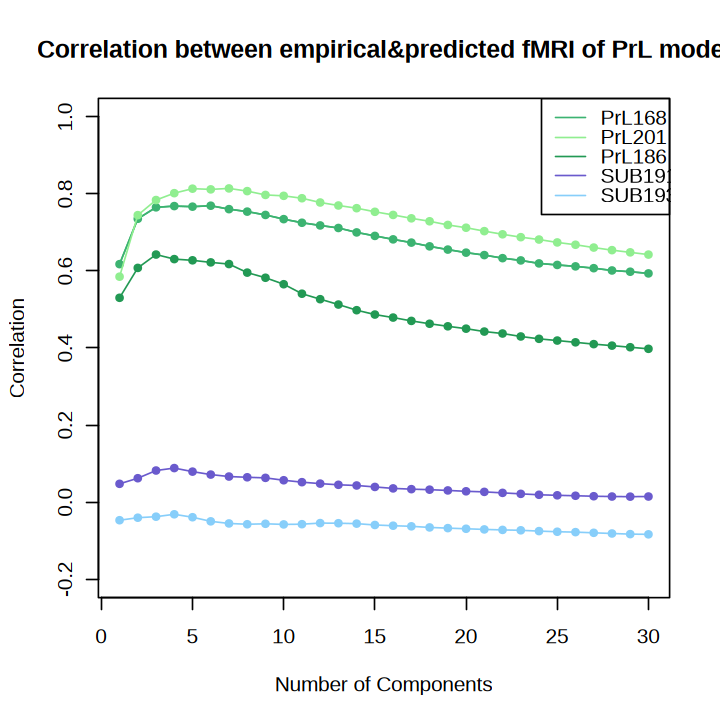

In [726]:
#pdf('./spot_PrL_3modelcorrelation_between_ofmri_prediction_overlap.pdf',width=6,height=6)
data <- data.frame(cbind(predcor168$ofmri_activation[0:30], 
                         predcor201$ofmri_activation[0:30], 
                         predcor186$ofmri_activation[0:30],
                         predcor191_pl$ofmri_activation[0:30], 
                         predcor193_pl$ofmri_activation[0:30]))
colnames(data) <- c('PrL168','PrL201','PrL186','SUB191','SUB193')
options(repr.plot.width=6,repr.plot.height=6)
Col.rar1 <- c("#3CB371", "#90EE90", "#229954", "#6A5ACD", "#87CEFA")
plot(1:30, data[,1], ylim=c(-0.2,1), type="l", col=Col.rar1[1],
     xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between empirical&predicted fMRI of PrL model")

lapply(seq_along(Col.rar1),function(i){
  lines(1:30, data[,i], col=Col.rar1[i])
  points(1:30, data[,i],pch=20, col=Col.rar1[i])  # this is optional
})

legend("topright", legend = c("PrL168", "PrL201", "PrL186",'SUB191','SUB193'), 
       col = c(Col.rar1[1], Col.rar1[2], Col.rar1[3], Col.rar1[4], Col.rar1[5]), 
       lty = 1)
#dev.off()

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

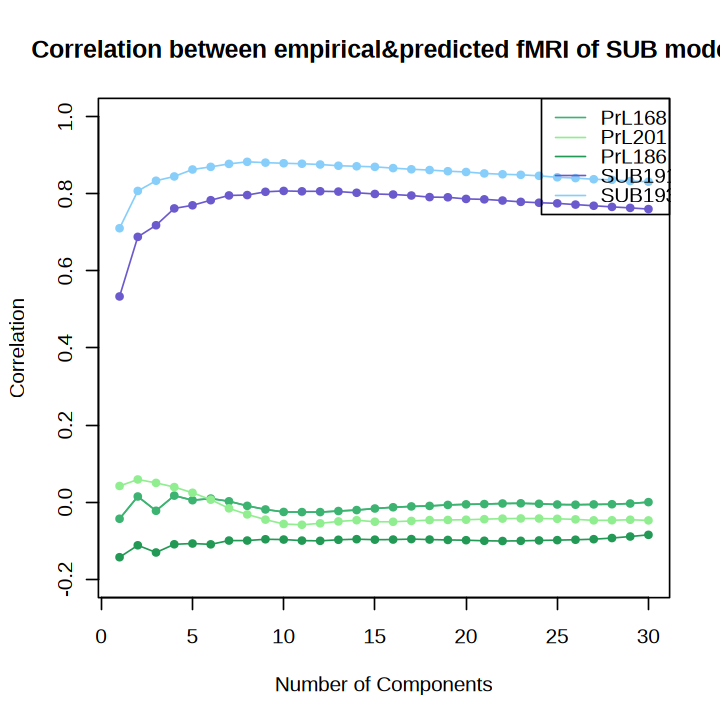

In [727]:
#pdf('./spot_SUB_2modelcorrelation_between_ofmri_prediction_overlap.pdf',width=6,height=6)
data <- data.frame(cbind(predcor168_sub$ofmri_activation[0:30], 
                         predcor201_sub$ofmri_activation[0:30], 
                         predcor186_sub$ofmri_activation[0:30],
                         predcor191$ofmri_activation[0:30], 
                         predcor193$ofmri_activation[0:30]))
colnames(data) <- c('PrL168','PrL201','PrL186','SUB191','SUB193')
options(repr.plot.width=6,repr.plot.height=6)
Col.rar1 <- c("#3CB371", "#90EE90", "#229954", "#6A5ACD", "#87CEFA")
plot(1:30, data[,1], ylim=c(-0.2,1), type="l", col=Col.rar1[1],
     xlab = "Number of Components", ylab = "Correlation",
     main="Correlation between empirical&predicted fMRI of SUB model")

lapply(seq_along(Col.rar1),function(i){
  lines(1:30, data[,i], col=Col.rar1[i])
  points(1:30, data[,i],pch=20, col=Col.rar1[i])  # this is optional
})

legend("topright", legend = c("PrL168", "PrL201", "PrL186",'SUB191','SUB193'), 
       col = c(Col.rar1[1], Col.rar1[2], Col.rar1[3], Col.rar1[4], Col.rar1[5]), 
       lty = 1)
#dev.off()

In [ ]:
result168$ofmri_activation168 <- result168$ofmri_activation
result201$ofmri_activation201 <- result201$ofmri_activation
result186$ofmri_activation186 <- result186$ofmri_activation
result191$ofmri_activation191 <- result191$ofmri_activation
result193$ofmri_activation193 <- result193$ofmri_activation
result168$ncomp5_168 <- result168$ncomp5
result201$ncomp5_201 <- result201$ncomp5
result186$ncomp5_186 <- result186$ncomp5
result191$ncomp5_191 <- result191$ncomp5
result193$ncomp5_193 <- result193$ncomp5

result168_sub$ofmri_activation168 <- result168_sub$ofmri_activation
result201_sub$ofmri_activation201 <- result201_sub$ofmri_activation
result186_sub$ofmri_activation186 <- result186_sub$ofmri_activation
result191_pl$ofmri_activation191 <- result191_pl$ofmri_activation
result193_pl$ofmri_activation193 <- result193_pl$ofmri_activation
result168_sub$ncomp5_168 <- result168_sub$ncomp5
result201_sub$ncomp5_201 <- result201_sub$ncomp5
result186_sub$ncomp5_186 <- result186_sub$ncomp5
result191_pl$ncomp5_191 <- result191_pl$ncomp5
result193_pl$ncomp5_193 <- result193_pl$ncomp5

In [ ]:
data <- data.frame(cbind(result168$ofmri_activation168, result201$ofmri_activation201, result186$ofmri_activation186, result191_pl$ofmri_activation201, result193_pl$ofmri_activation186,
                        result168$ncomp5_168, result201$ncomp5_201,result186$ncomp5_186,result191_pl$ncomp5_191,result193_pl$ncomp5_193))

colnames(data) <- c('ofmri168','ofmri201','ofmri186','ofmri191','ofmri193','ncomp168','ncomp201','ncomp186','ncomp191','ncomp193')

#pdf('./spot_PrL3model_correlation_scatter_overlap.pdf',width=8,height=8)
colors <- c("PrL168" = "#3CB371", "PrL201" = "#90EE90", "PrL186" = "#229954","SUB191" = "#6A5ACD", "SUB193" = "#87CEFA")
#Col.rar1<-c("#3498db", "#e74c3c","#229954")
options(repr.plot.width=8,repr.plot.height=8)
ggplot(data)+
geom_point(aes(x=ncomp168,y=ofmri168,color='PrL168'))+
geom_smooth(aes(x=ncomp168,y=ofmri168,color='PrL168'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp201,y=ofmri201,color='PrL201'))+
geom_smooth(aes(x=ncomp201,y=ofmri201,color='PrL201'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp186,y=ofmri186,color='PrL186'))+
geom_smooth(aes(x=ncomp186,y=ofmri186,color='PrL186'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp191,y=ofmri191,color='SUB191'))+
geom_smooth(aes(x=ncomp191,y=ofmri191,color='SUB191'),method="lm",se=TRUE)+
geom_point(aes(x=ncomp193,y=ofmri193,color='SUB193'))+
geom_smooth(aes(x=ncomp193,y=ofmri193,color='SUB193'),method="lm",se=TRUE)+
xlab('prediction')+
ylab('true value')+
scale_color_manual(values=colors)+
theme_classic()
#dev.off()

### VIP score of overlap model

In [275]:
getwd()

[1] "/newdatc/home/wanglab41/opto_fMRI_ST/fmri_th"

In [287]:
Beta <- model_pl$coefficients
W <- model_pl$loading.weights
P <- model_pl$loadings
Q <- model_pl$Yloadings
T <- model_pl$scores
vip_pl <- VIP(Q,T,W)
write.csv(vip_pl,'./spot_PrL_vipscores_overlap_vip15.csv')

In [308]:
W_rownames <- rownames(W)
pl_VIP_values <- numeric(length(W_rownames))
names(pl_VIP_values) <- W_rownames
for (j in 1:dim(W)[1]) {
  pl_VIP_values[j] <- VIPjh(Q, T, W, j, 5)
}
pl_VIP_values_df <- data.frame(Gene = names(pl_VIP_values), VIP = pl_VIP_values, stringsAsFactors = FALSE)
write.csv(pl_VIP_values_df,'./spot_PrL_vipscores_overlap_vip15_comp5.csv')

In [309]:
top_genes <- pl_VIP_values_df[pl_VIP_values_df$VIP >= 1.5, ]
top_genes_sorted <- top_genes[order(-top_genes$VIP), ]
pdf('./spot_PrL_vipscores_overlap_vip15_comp5.pdf', width=8, height=8)
ggplot(top_genes_sorted, aes(x=reorder(Gene, VIP), y=VIP, fill=ifelse(VIP > 0, "Positive", "Negative"))) +
  geom_bar(stat="identity") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Gene", y = "VIP", title = "Genes with VIP >= 1.5") +
  scale_fill_manual(values=c("Positive"="red")) + # 由于只有正值，所以只设置一个颜色
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

In [313]:
Beta <- model_sub$coefficients
W <- model_sub$loading.weights
P <- model_sub$loadings
Q <- model_sub$Yloadings
T <- model_sub$scores
vip_sub <- VIP(Q,T,W)
write.csv(vip_sub,'./spot_SUB_vipscores_overlap_vip15.csv')

In [314]:
W_rownames <- rownames(W)
pl_VIP_values <- numeric(length(W_rownames))
names(pl_VIP_values) <- W_rownames
for (j in 1:dim(W)[1]) {
  pl_VIP_values[j] <- VIPjh(Q, T, W, j, 5)
}
pl_VIP_values_df <- data.frame(Gene = names(pl_VIP_values), VIP = pl_VIP_values, stringsAsFactors = FALSE)
write.csv(pl_VIP_values_df,'./spot_sub_vipscores_overlap_vip15_comp7.csv')

In [316]:
top_genes <- pl_VIP_values_df[pl_VIP_values_df$VIP >= 1.5, ]
top_genes_sorted <- top_genes[order(-top_genes$VIP), ]
pdf('./spot_SUB_vipscores_overlap_vip15_comp5.pdf', width=8, height=8)
ggplot(top_genes_sorted, aes(x=reorder(Gene, VIP), y=VIP, fill=ifelse(VIP > 0, "Positive", "Negative"))) +
  geom_bar(stat="identity") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Gene", y = "VIP", title = "Genes with VIP >= 1.5") +
  scale_fill_manual(values=c("Positive"="red")) + # 由于只有正值，所以只设置一个颜色
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

## rank component gene weight

In [366]:
loading.weights <- model_pl$loading.weights[,]
loading.weights <- data.frame(loading.weights)
yloadings <- data.frame(model_pl$Yloadings[,])
spatialmap <- X_pl_scaled_o
spatialmap$ofmri_activation <- NULL
genes <- rownames(loading.weights)
components <- colnames(loading.weights)

### prl pls1

In [336]:
model_pl <- readRDS('./spot_model_plvip15.rds')
model_sub <- readRDS('./spot_model_subvip15.rds')

In [367]:
comp_values <- loading.weights[, "Comp.1"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./pl_vip15_gene_weight_comp1.csv')

In [368]:
pdf('./pl_vip15_gene_weight_comp1.pdf',width=5,height=8)
options(repr.plot.width=5,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_20_genes <- pl_gene_weight_comp_sorted[1:20, ]
top_20_genes$AbsWeight <- abs(top_20_genes$Weight)
ggplot(top_20_genes, aes(x=reorder(Gene, AbsWeight), y=AbsWeight)) +
  geom_bar(stat="identity", fill="grey") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Gene", y = "Absolute Weight", title = "Top 20 Genes by Absolute Weight") +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

### prl pls2

In [369]:
comp_values <- loading.weights[, "Comp.2"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./pl_vip15_gene_weight_comp2.csv')

In [370]:
pdf('./pl_vip15_gene_weight_comp2.pdf',width=5,height=8)
options(repr.plot.width=5,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_20_genes <- pl_gene_weight_comp_sorted[1:20, ]
top_20_genes$AbsWeight <- abs(top_20_genes$Weight)
ggplot(top_20_genes, aes(x=reorder(Gene, AbsWeight), y=AbsWeight)) +
  geom_bar(stat="identity", fill="grey") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Gene", y = "Absolute Weight", title = "Top 20 Genes by Absolute Weight") +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

### prl pls3

In [371]:
comp_values <- loading.weights[, "Comp.3"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./pl_vip15_gene_weight_comp3.csv')

In [372]:
pdf('./pl_vip15_gene_weight_comp3.pdf',width=5,height=8)
options(repr.plot.width=5,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_20_genes <- pl_gene_weight_comp_sorted[1:20, ]
top_20_genes$AbsWeight <- abs(top_20_genes$Weight)
ggplot(top_20_genes, aes(x=reorder(Gene, AbsWeight), y=AbsWeight)) +
  geom_bar(stat="identity", fill="grey") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Gene", y = "Absolute Weight", title = "Top 20 Genes by Absolute Weight") +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

### prl pls4

In [255]:
comp_values <- loading.weights[, "Comp.4"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./pl_vip15_gene_weight_comp4.csv')

In [256]:
pdf('./pl_vip15_gene_weight_comp4.pdf',width=8,height=8)
options(repr.plot.width=8,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_positive_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight > 0, ][1:10, ]
top_negative_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight < 0, ][1:10, ]
top_20_genes <- rbind(top_positive_genes, top_negative_genes)
ggplot(top_20_genes, aes(x=reorder(Gene, Weight), y=Weight, fill=ifelse(Weight > 0, "Positive", "Negative"))) +
  geom_bar(stat="identity") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Weight", y = "Gene", title = "Top 10 Positive and Negative Weighted Genes") +
  scale_fill_manual(values=c("Positive"="red", "Negative"="blue")) +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

### prl pls5

In [257]:
comp_values <- loading.weights[, "Comp.5"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./pl_vip15_gene_weight_comp5.csv')

In [258]:
pdf('./pl_vip15_gene_weight_comp5.pdf',width=5,height=8)
options(repr.plot.width=8,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_positive_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight > 0, ][1:10, ]
top_negative_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight < 0, ][1:10, ]
top_20_genes <- rbind(top_positive_genes, top_negative_genes)
ggplot(top_20_genes, aes(x=reorder(Gene, Weight), y=Weight, fill=ifelse(Weight > 0, "Positive", "Negative"))) +
  geom_bar(stat="identity") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Weight", y = "Gene", title = "Top 10 Positive and Negative Weighted Genes") +
  scale_fill_manual(values=c("Positive"="red", "Negative"="blue")) +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

In [373]:
loading.weights <- model_sub$loading.weights[,]
loading.weights <- data.frame(loading.weights)
yloadings <- data.frame(model_sub$Yloadings[,])
spatialmap <- X_sub_scaled_o
spatialmap$ofmri_activation <- NULL
genes <- rownames(loading.weights)
components <- colnames(loading.weights)

### sub pls1

In [374]:
comp_values <- loading.weights[, "Comp.1"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./sub_vip15_gene_weight_comp1.csv')

In [375]:
pdf('./sub_vip15_gene_weight_comp1.pdf',width=5,height=8)
options(repr.plot.width=5,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_20_genes <- pl_gene_weight_comp_sorted[1:20, ]
top_20_genes$AbsWeight <- abs(top_20_genes$Weight)
ggplot(top_20_genes, aes(x=reorder(Gene, AbsWeight), y=AbsWeight)) +
  geom_bar(stat="identity", fill="grey") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Gene", y = "Absolute Weight", title = "Top 20 Genes by Absolute Weight") +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

### sub pls2

In [376]:
comp_values <- loading.weights[, "Comp.2"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./sub_vip15_gene_weight_comp2.csv')

In [377]:
pdf('./sub_vip15_gene_weight_comp2.pdf',width=5,height=8)
options(repr.plot.width=5,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_20_genes <- pl_gene_weight_comp_sorted[1:20, ]
top_20_genes$AbsWeight <- abs(top_20_genes$Weight)
ggplot(top_20_genes, aes(x=reorder(Gene, AbsWeight), y=AbsWeight)) +
  geom_bar(stat="identity", fill="grey") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Gene", y = "Absolute Weight", title = "Top 20 Genes by Absolute Weight") +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

### sub pls3

In [378]:
comp_values <- loading.weights[, "Comp.3"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./sub_vip15_gene_weight_comp3.csv')

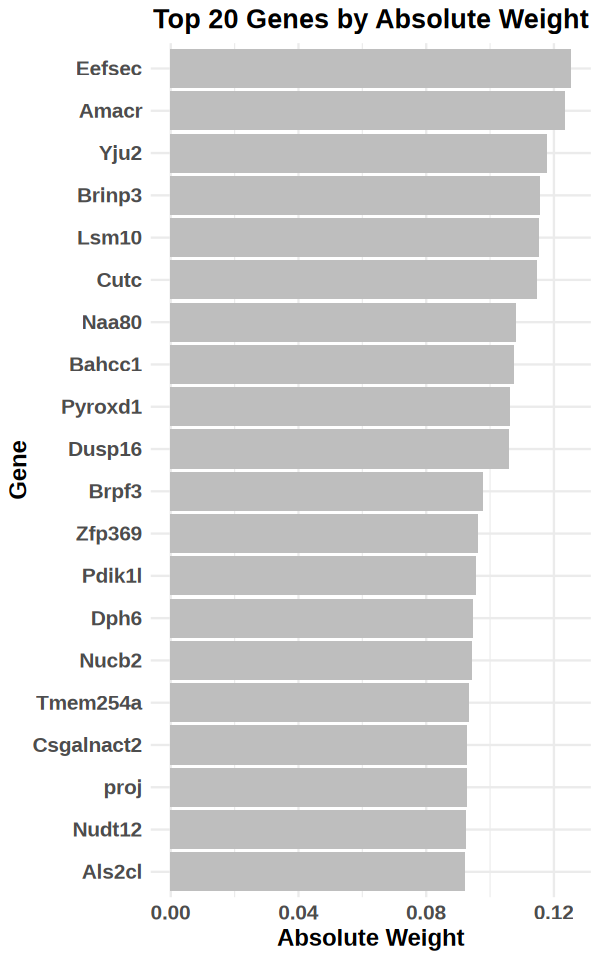

In [380]:
#pdf('./sub_vip15_gene_weight_comp3.pdf',width=5,height=8)
options(repr.plot.width=5,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_20_genes <- pl_gene_weight_comp_sorted[1:20, ]
top_20_genes$AbsWeight <- abs(top_20_genes$Weight)
ggplot(top_20_genes, aes(x=reorder(Gene, AbsWeight), y=AbsWeight)) +
  geom_bar(stat="identity", fill="grey") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Gene", y = "Absolute Weight", title = "Top 20 Genes by Absolute Weight") +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
#dev.off()

### sub pls4

In [266]:
comp_values <- loading.weights[, "Comp.4"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./sub_vip15_gene_weight_comp4.csv')

In [267]:
pdf('./sub_vip15_gene_weight_comp4.pdf',width=8,height=8)
options(repr.plot.width=8,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_positive_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight > 0, ][1:10, ]
top_negative_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight < 0, ][1:10, ]
top_20_genes <- rbind(top_positive_genes, top_negative_genes)
ggplot(top_20_genes, aes(x=reorder(Gene, Weight), y=Weight, fill=ifelse(Weight > 0, "Positive", "Negative"))) +
  geom_bar(stat="identity") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Weight", y = "Gene", title = "Top 10 Positive and Negative Weighted Genes") +
  scale_fill_manual(values=c("Positive"="red", "Negative"="blue")) +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

### sub pls5

In [268]:
comp_values <- loading.weights[, "Comp.5"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./sub_vip15_gene_weight_comp5.csv')

In [269]:
pdf('./sub_vip15_gene_weight_comp5.pdf',width=8,height=8)
options(repr.plot.width=8,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_positive_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight > 0, ][1:10, ]
top_negative_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight < 0, ][1:10, ]
top_20_genes <- rbind(top_positive_genes, top_negative_genes)
ggplot(top_20_genes, aes(x=reorder(Gene, Weight), y=Weight, fill=ifelse(Weight > 0, "Positive", "Negative"))) +
  geom_bar(stat="identity") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Weight", y = "Gene", title = "Top 10 Positive and Negative Weighted Genes") +
  scale_fill_manual(values=c("Positive"="red", "Negative"="blue")) +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

### sub pls6

In [270]:
comp_values <- loading.weights[, "Comp.6"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./sub_vip15_gene_weight_comp6.csv')

In [271]:
pdf('./sub_vip15_gene_weight_comp6.pdf',width=8,height=8)
options(repr.plot.width=8,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_positive_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight > 0, ][1:10, ]
top_negative_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight < 0, ][1:10, ]
top_20_genes <- rbind(top_positive_genes, top_negative_genes)
ggplot(top_20_genes, aes(x=reorder(Gene, Weight), y=Weight, fill=ifelse(Weight > 0, "Positive", "Negative"))) +
  geom_bar(stat="identity") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Weight", y = "Gene", title = "Top 10 Positive and Negative Weighted Genes") +
  scale_fill_manual(values=c("Positive"="red", "Negative"="blue")) +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
dev.off()

pdf 
  2

### sub pls7

In [272]:
comp_values <- loading.weights[, "Comp.7"]
gene_names <- rownames(loading.weights)
ranked_values <- rank(comp_values, ties.method = "average")
pl_gene_weight_comp <- data.frame(
  Gene = gene_names,
  Weight = comp_values, 
  Rank = ranked_values 
)
pl_gene_weight_comp <- pl_gene_weight_comp[order(pl_gene_weight_comp$Rank), ]
write.csv(pl_gene_weight_comp,'./sub_vip15_gene_weight_comp7.csv')

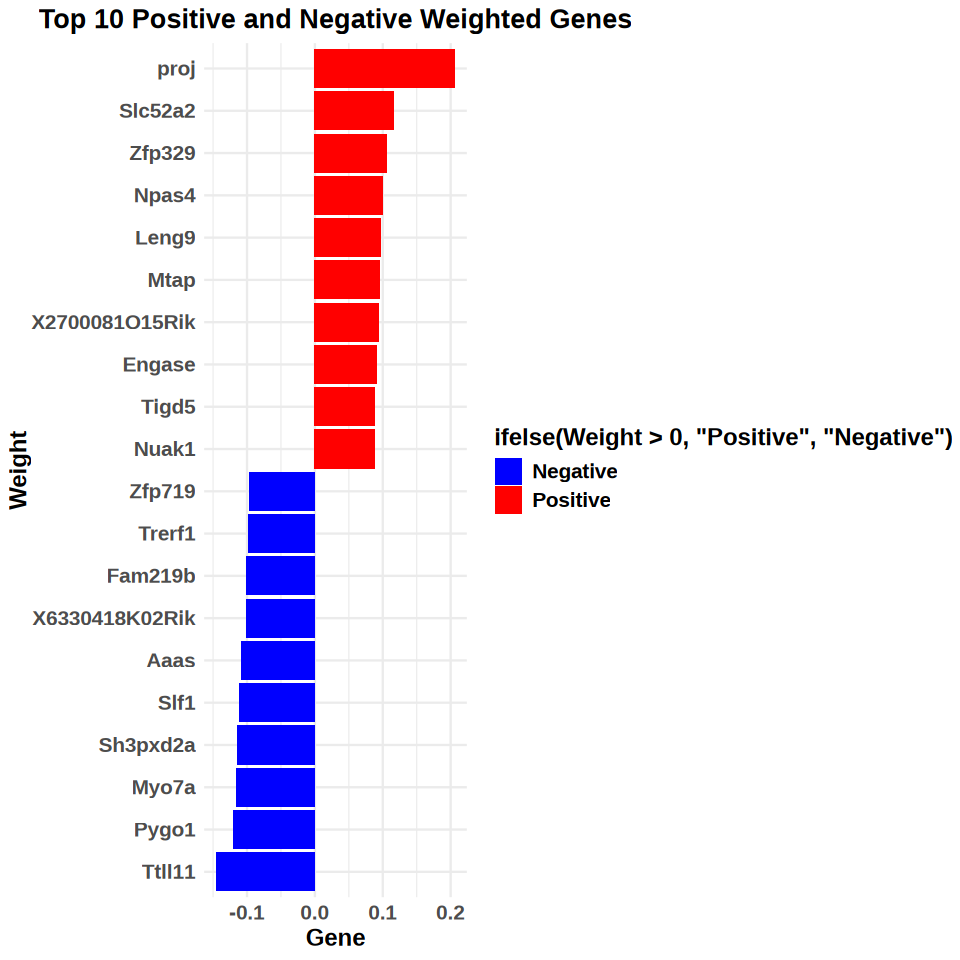

In [274]:
#pdf('./sub_vip15_gene_weight_comp7.pdf',width=8,height=8)
options(repr.plot.width=8,repr.plot.height=8)
pl_gene_weight_comp_sorted <- pl_gene_weight_comp[order(-abs(pl_gene_weight_comp$Weight)), ]
top_positive_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight > 0, ][1:10, ]
top_negative_genes <- pl_gene_weight_comp_sorted[pl_gene_weight_comp_sorted$Weight < 0, ][1:10, ]
top_20_genes <- rbind(top_positive_genes, top_negative_genes)
ggplot(top_20_genes, aes(x=reorder(Gene, Weight), y=Weight, fill=ifelse(Weight > 0, "Positive", "Negative"))) +
  geom_bar(stat="identity") +
  coord_flip() + 
  theme_minimal() +
  labs(x = "Weight", y = "Gene", title = "Top 10 Positive and Negative Weighted Genes") +
  scale_fill_manual(values=c("Positive"="red", "Negative"="blue")) +
  theme(
    axis.title = element_text(size=14, face="bold"), 
    axis.text = element_text(size=12, face="bold"), 
    legend.title = element_text(size=14, face="bold"), 
    legend.text = element_text(size=12, face="bold"), 
    plot.title = element_text(size=16, face="bold", hjust=0.5) 
  )
#dev.off()

In [156]:
for(g in genes){
    for(i in 1:179){
        lw <- loading.weights[g,paste0('Comp.',i)]
        sm <- spatialmap[,g]
        re <- data.frame(lw*sm)
        re <- re*yloadings[paste0('Comp ',i),]
        colnames(re) <- paste0('PLS',i)
        if(i == 1){
            result <- re
        }else{
            result <- cbind(result,re)
        }
    }
    result_g <- data.frame(rowMeans(result))
    colnames(result_g) <- g
    if(g == 'Npl'){
        result_gene <- result_g
    }else{
        result_gene <- cbind(result_gene,result_g)
    }
}

ERROR: Error: object 'result_gene' not found


In [165]:
for(g in genes){
    for(i in 1:179){
        lw <- loading.weights[g,paste0('Comp.',i)]
        sm <- spatialmap[,g]
        re <- data.frame(lw*sm)
        re <- re*yloadings[paste0('Comp ',i),]
        colnames(re) <- paste0('PLS',i)
        if(i == 1){
            result <- re
        }else{
            result <- cbind(result,re)
        }
    }
    result_g <- data.frame(rowMeans(result))
    colnames(result_g) <- g
    result_gene <- result_g
}

In [166]:
pl_result_gene <- result_gene

In [167]:
loading.weights <- model_sub$loading.weights[,]

In [168]:
loading.weights <- data.frame(loading.weights)

In [169]:
yloadings <- data.frame(model_sub$Yloadings[,])

In [170]:
spatialmap <- X_sub_scaled_o

In [171]:
spatialmap$ofmri_activation <- NULL

In [172]:
genes <- rownames(loading.weights)
components <- colnames(loading.weights)

In [173]:
dim(loading.weights)

[1] 232 232

In [174]:
for(g in genes){
    for(i in 1:232){
        lw <- loading.weights[g,paste0('Comp.',i)]
        sm <- spatialmap[,g]
        re <- data.frame(lw*sm)
        re <- re*yloadings[paste0('Comp ',i),]
        colnames(re) <- paste0('PLS',i)
        if(i == 1){
            result <- re
        }else{
            result <- cbind(result,re)
        }
    }
    result_g <- data.frame(rowMeans(result))
    colnames(result_g) <- g
    result_gene <- result_g
}

In [175]:
sub_result_gene <- result_gene

In [176]:
write.csv(pl_result_gene,'./PrL_gene_spatialcontribution_allcomp.csv')
write.csv(sub_result_gene,'./SUB_gene_spatialcontribution_allcomp.csv')

In [177]:
write.csv(X_pl_scaled_o,'./PrL_spatialmap.csv')
write.csv(X_sub_scaled_o,'./SUB_spatialmap.csv')

In [178]:
loading.weights <- model_pl$loading.weights[,]

In [179]:
loading.weights <- data.frame(loading.weights)

In [180]:
yloadings <- data.frame(model_pl$Yloadings[,])

In [181]:
spatialmap <- X_pl_scaled_o

In [182]:
spatialmap$ofmri_activation <- NULL

In [183]:
genes <- rownames(loading.weights)
components <- colnames(loading.weights)

In [184]:
genes[1]

[1] "Rundc1"

In [185]:
for(g in genes){
    for(i in 1:5){
        lw <- loading.weights[g,paste0('Comp.',i)]
        sm <- spatialmap[,g]
        re <- data.frame(lw*sm)
        re <- re*yloadings[paste0('Comp ',i),]
        colnames(re) <- paste0('PLS',i)
        if(i == 1){
            result <- re
        }else{
            result <- cbind(result,re)
        }
    }
    result_g <- data.frame(rowMeans(result))
    colnames(result_g) <- g
    if(g == 'Npl'){
        result_gene <- result_g
    }else{
        result_gene <- cbind(result_gene,result_g)
    }
}

In [186]:
pl_result_gene5 <- result_gene

In [187]:
loading.weights <- model_sub$loading.weights[,]

In [188]:
loading.weights <- data.frame(loading.weights)

In [189]:
spatialmap <- X_sub_scaled_o

In [190]:
spatialmap$ofmri_activation <- NULL

In [191]:
yloadings <- data.frame(model_sub$Yloadings[,])

In [192]:
genes <- rownames(loading.weights)
components <- colnames(loading.weights)

In [193]:
dim(loading.weights)

[1] 232 232

In [194]:
genes[1]

[1] "Gm3636"

In [195]:
for(g in genes){
    for(i in 1:5){
        lw <- loading.weights[g,paste0('Comp.',i)]
        sm <- spatialmap[,g]
        re <- data.frame(lw*sm)
        re <- re*yloadings[paste0('Comp ',i),]
        colnames(re) <- paste0('PLS',i)
        if(i == 1){
            result <- re
        }else{
            result <- cbind(result,re)
        }
    }
    result_g <- data.frame(rowMeans(result))
    colnames(result_g) <- g
    if(g == 'Npl'){
        result_gene <- result_g
    }else{
        result_gene <- cbind(result_gene,result_g)
    }
}

In [196]:
sub_result_gene5 <- result_gene

In [197]:
dim(pl_result_gene)

[1] 1680    1

In [198]:
dim(pl_result_gene16)

ERROR: Error: object 'pl_result_gene16' not found


In [199]:
dim(sub_result_gene)

[1] 1680    1

In [926]:
dim(sub_result_gene8)

[1] 1680 1609

In [202]:
write.csv(pl_result_gene5,'./PrL_gene_spatialcontribution_5comp.csv')
write.csv(sub_result_gene5,'./SUB_gene_spatialcontribution_5comp.csv')